## [Getting Started with the ADK](https://developer.watson-orchestrate.ibm.com/getting_started/installing#ibm-cloud)

### Required Software

In [1]:
!python --version

Python 3.11.13


### 1.) Installing the ADK 

In [2]:
!pip install --upgrade ibm-watsonx-orchestrate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 103.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 47.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 118.3 MB/s  0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: zstandard━━━━━━━━━━━━━━━  0/14 [pytz]
    Found existing installation: zstandard 0.25.0 0/14 [pytz]
    Uninstalling zstandard-0.25.0:━━━━━━━━━━  0/14 [pytz]
      Successfully uninstalled zstandard-0.25.0m  0/14 [pytz]
  Attempting uninstall: pyyaml0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/14 [redis]ard]
    Found existing installation: PyYAML 6.0.1━━━━━━━━━━━━━━━━━  2/14 [redis]
    Uninstalling PyYAML-6.0.1:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/14 [redis]
      Successfully uninstalled PyYAML-6.0.1━━━━━━━━━━━━━━━━━━━  2/14 [redis]
  Attempting uninstall: packaging━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2

### 2.) Configure Your Env in ADK

To connect to IBM Cloud you need both the **service instance URL** and an **API key** of your watsonx orchestrate instance 

**1.)** Login to watsonx Orchestrate Instance. [URL](https://us-south.watson-orchestrate.cloud.ibm.com/chat) <br>
<br>
**2.)** Click your user icon on the top right and click **Settings**<br>
<br>
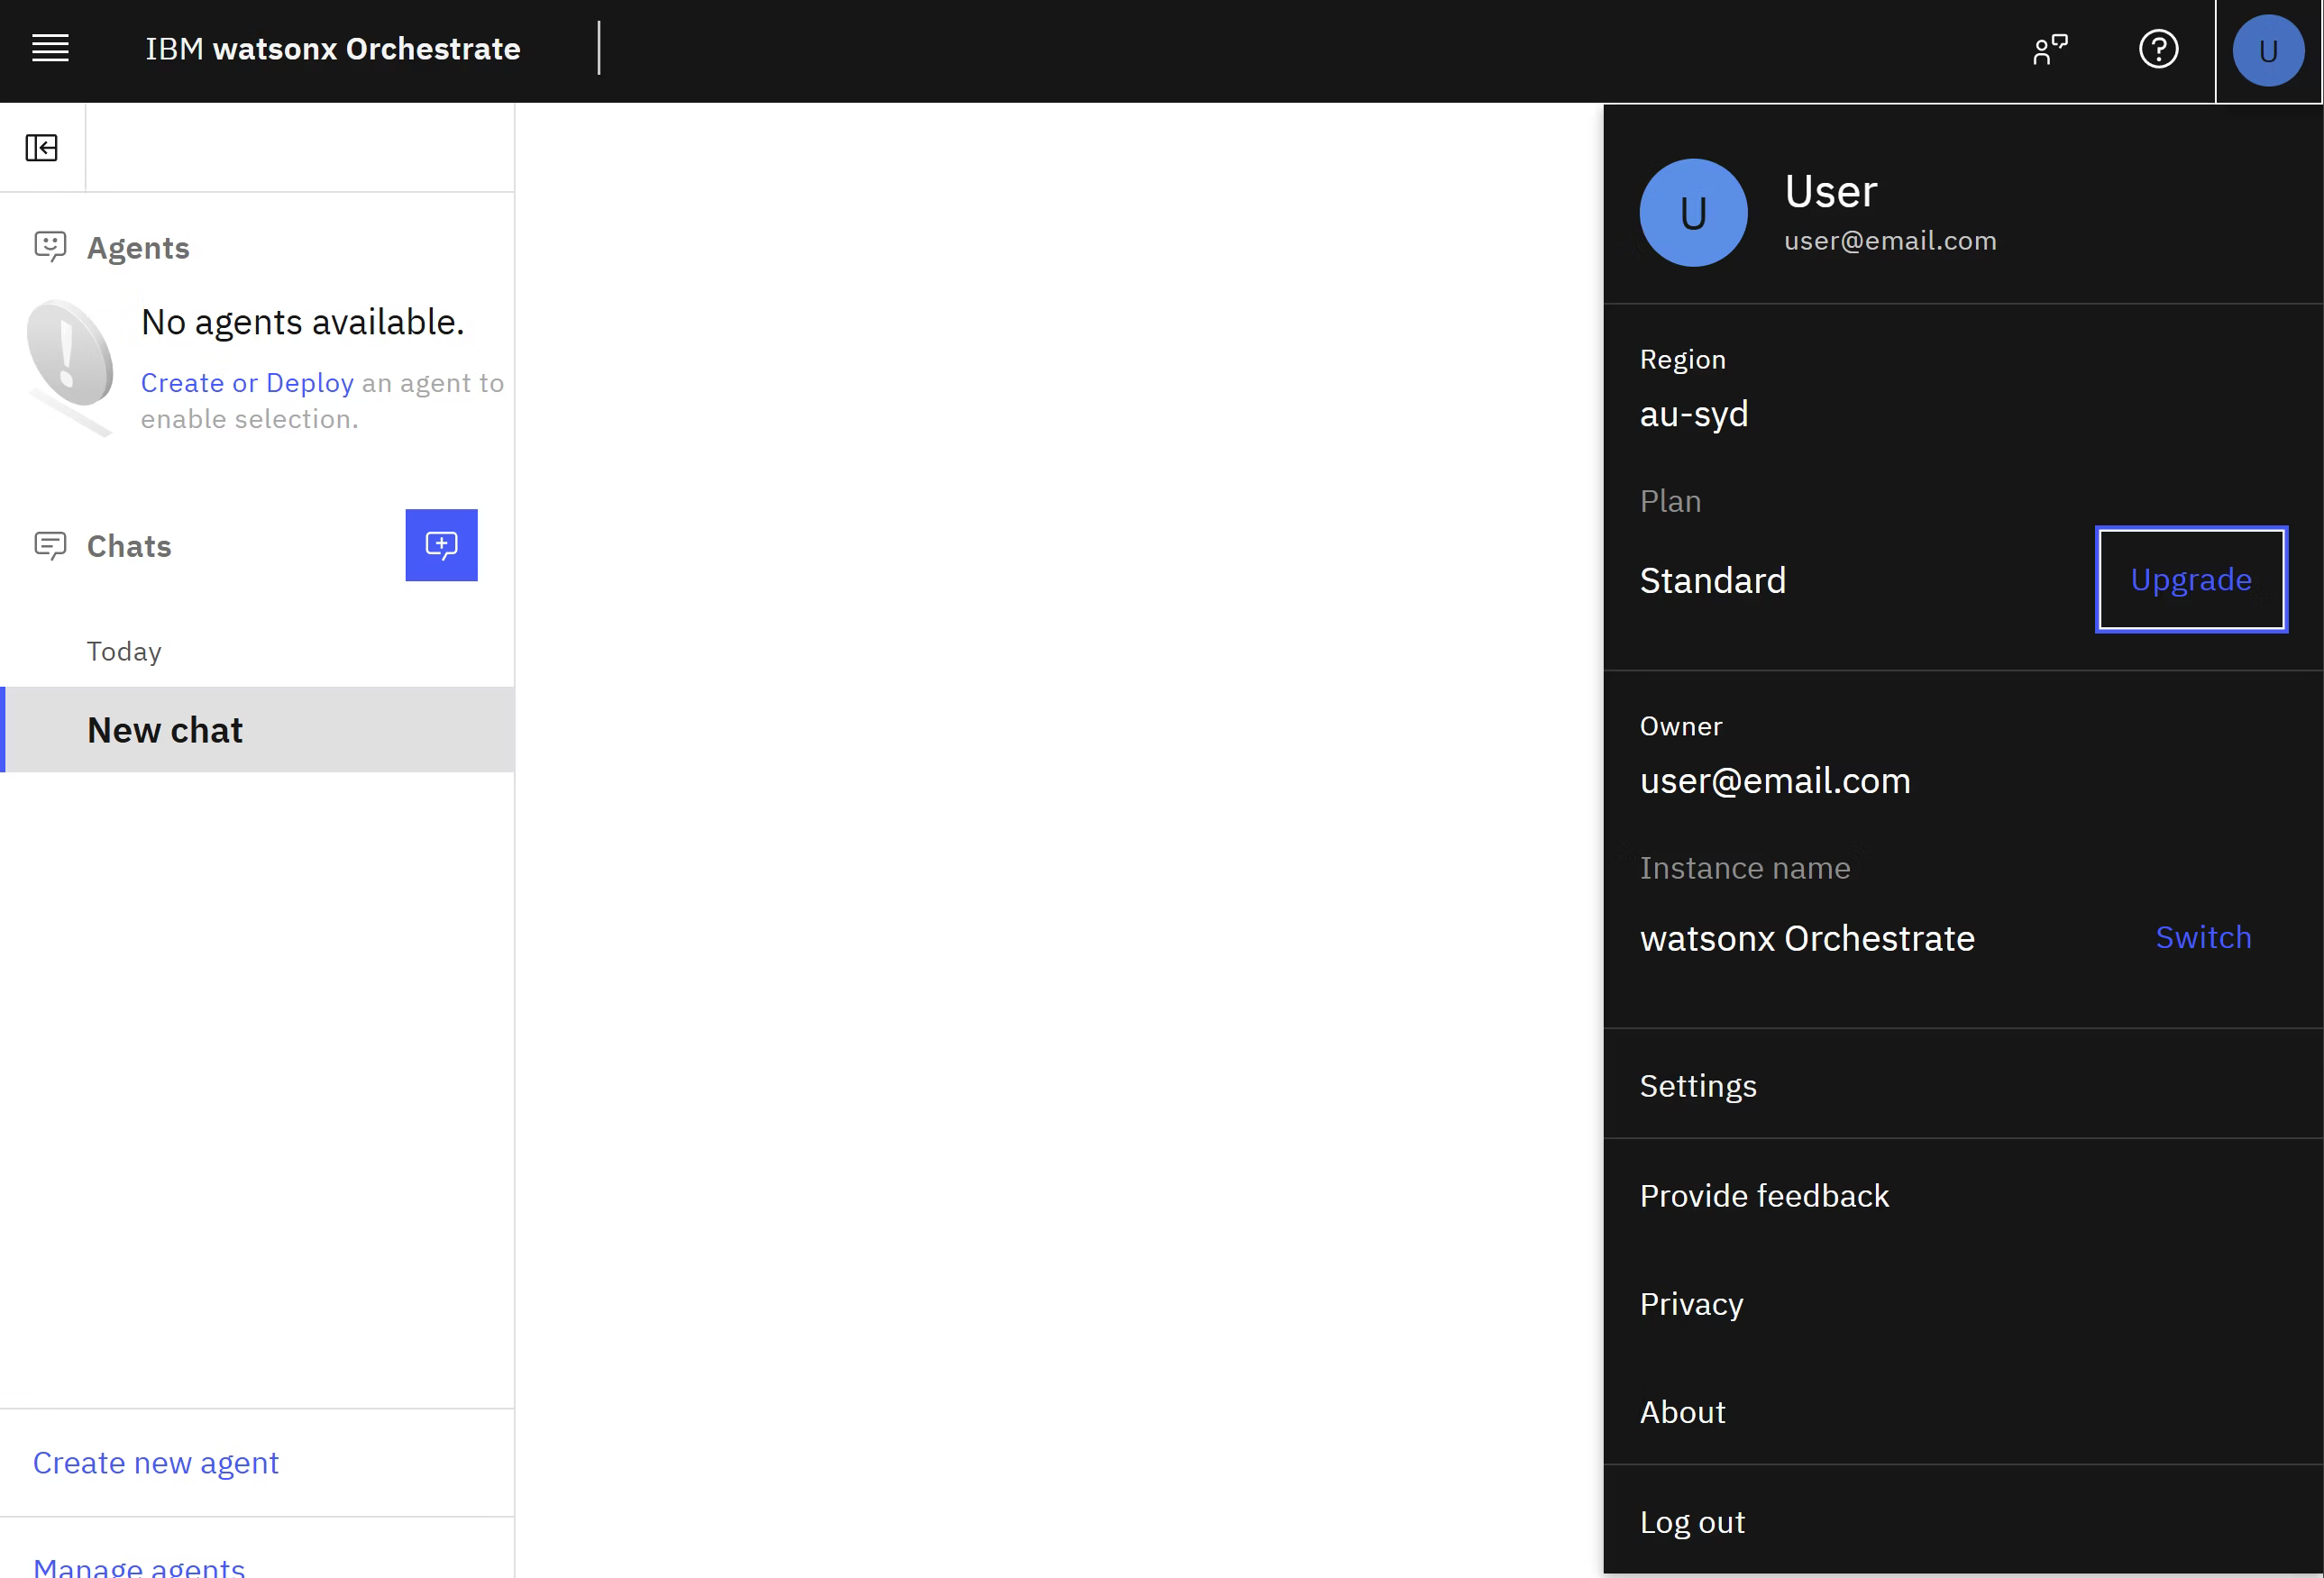
<br>
**3.)** Go the **API details** tab <br>
<br>
**4.)** Copy the **service instance URL**<br>
<br>
**5.)** Click the **Generate API Key** button <br>
<br>
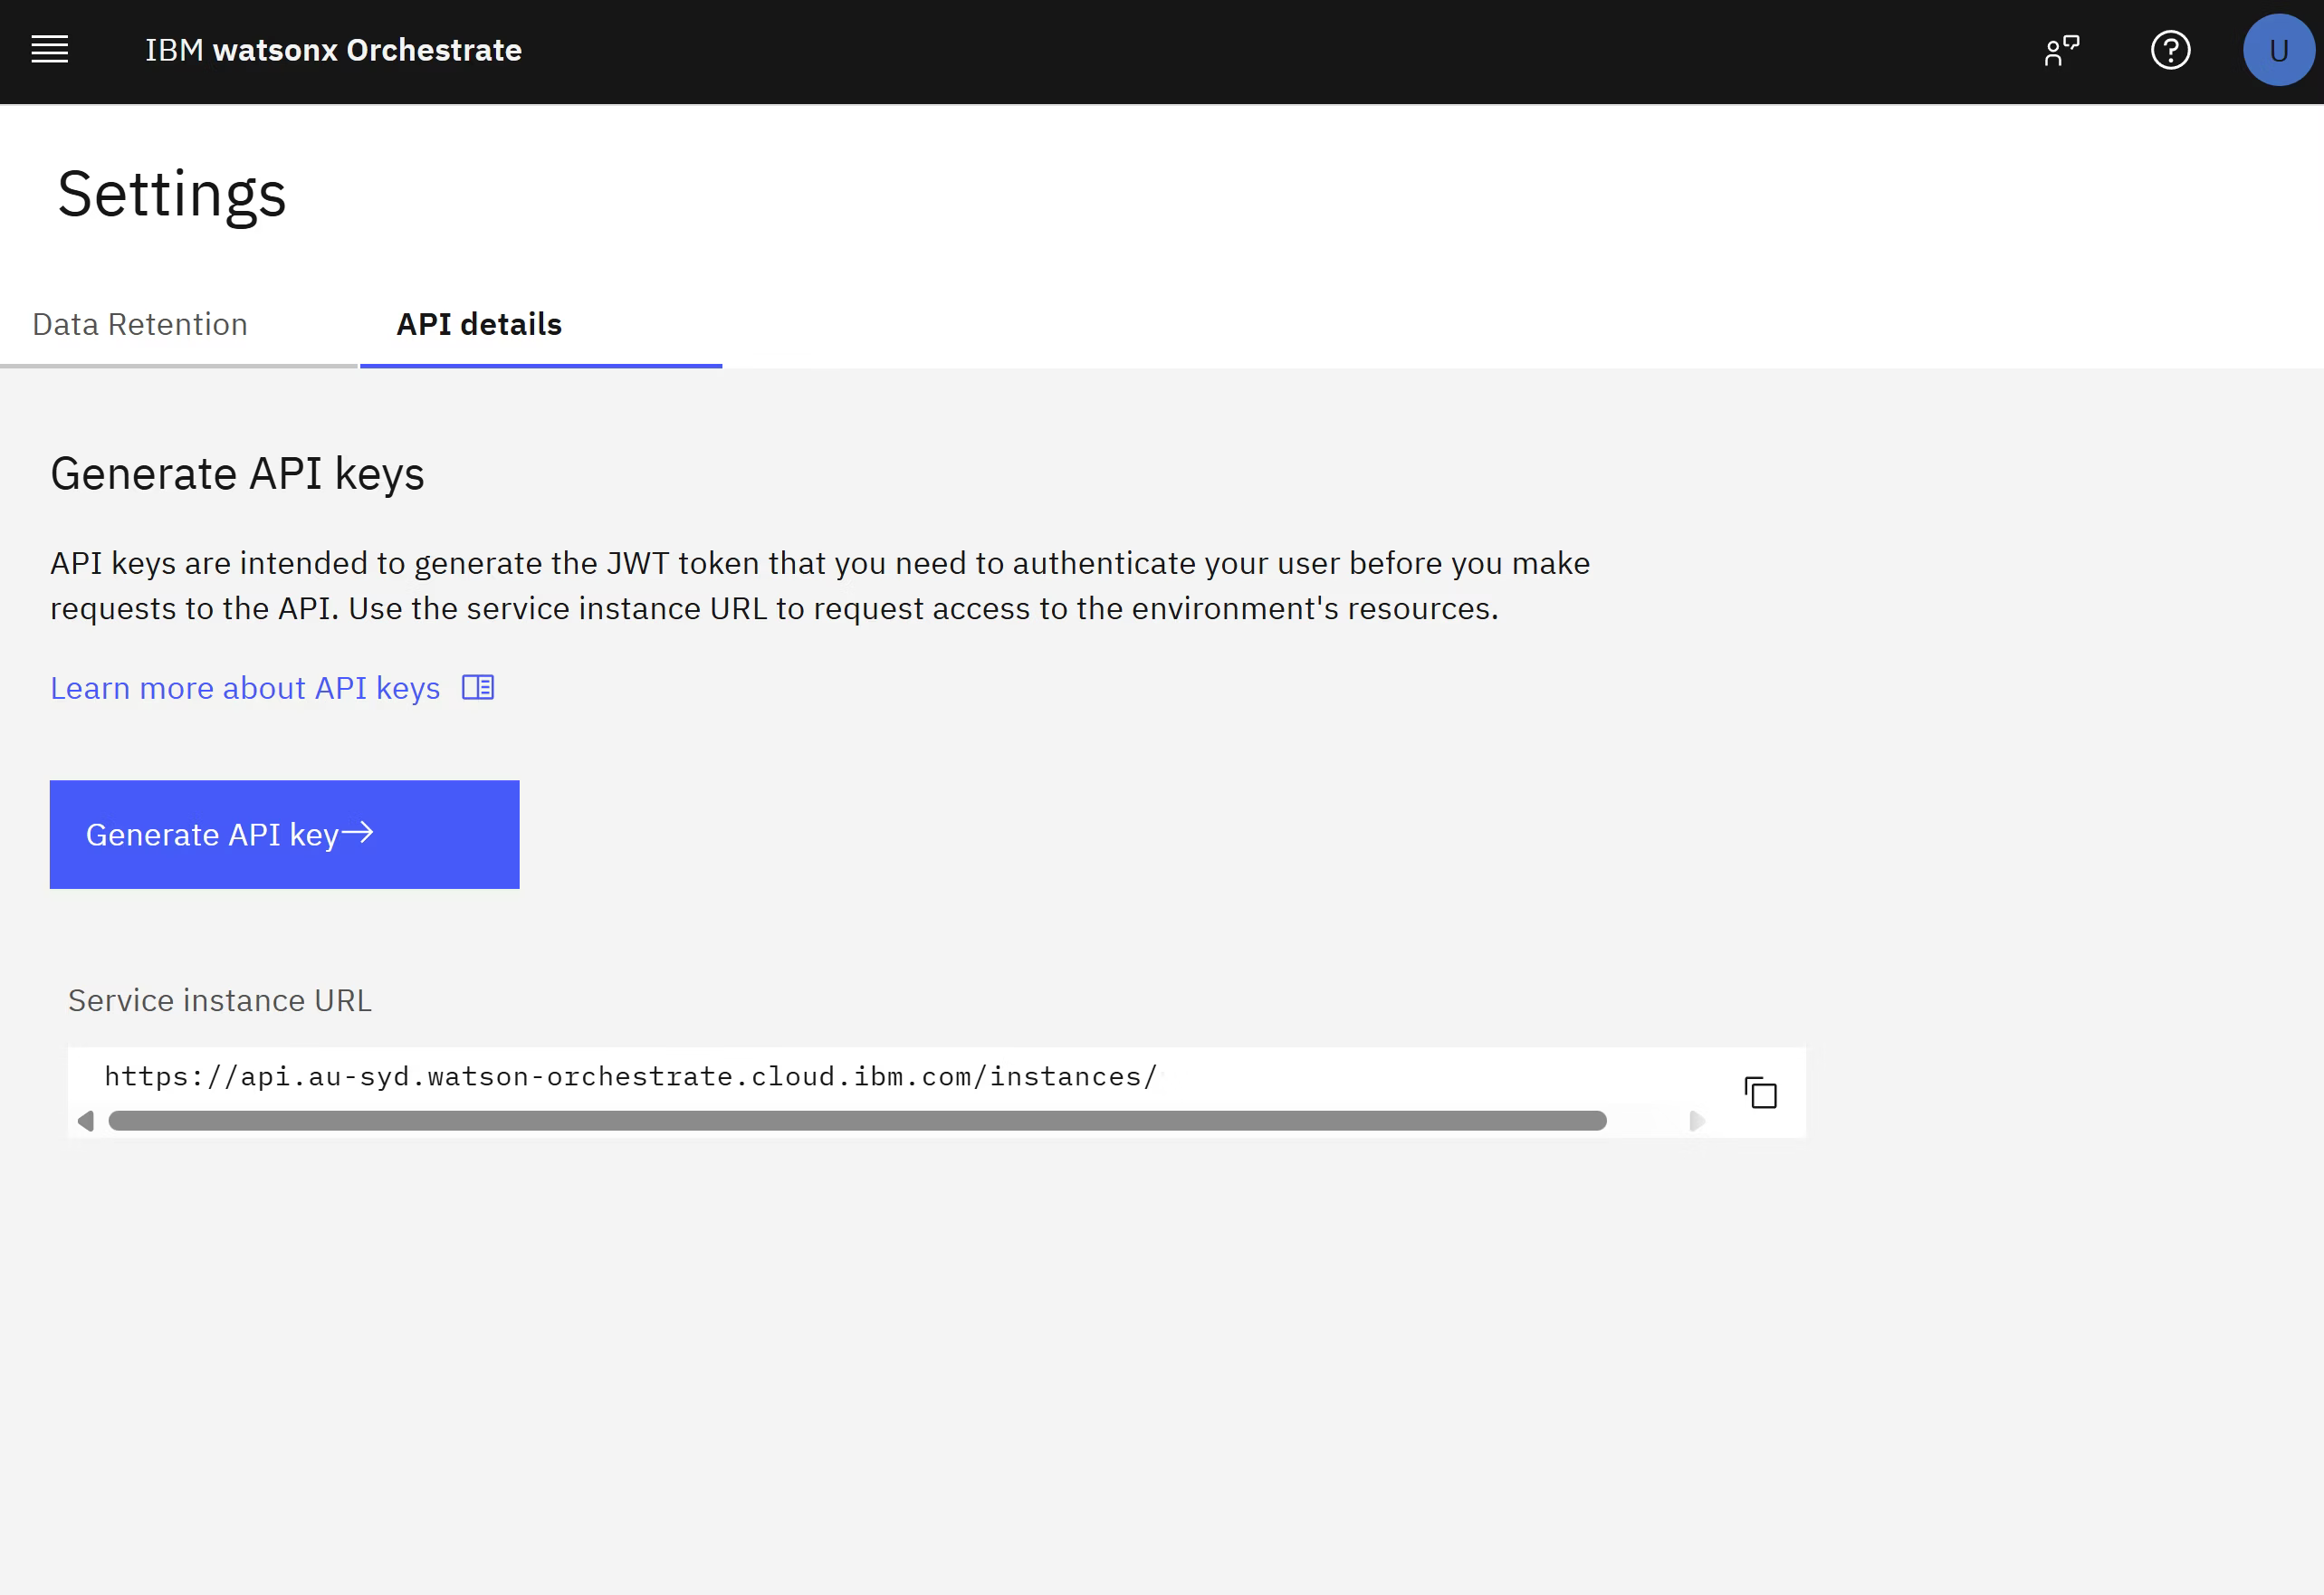
<br>
**6.)** **Generate an API Key**<br>
The page redirects you to the IBM Cloud Identity Access Management center. Click **Create** to create a new API key.<br>
<br>
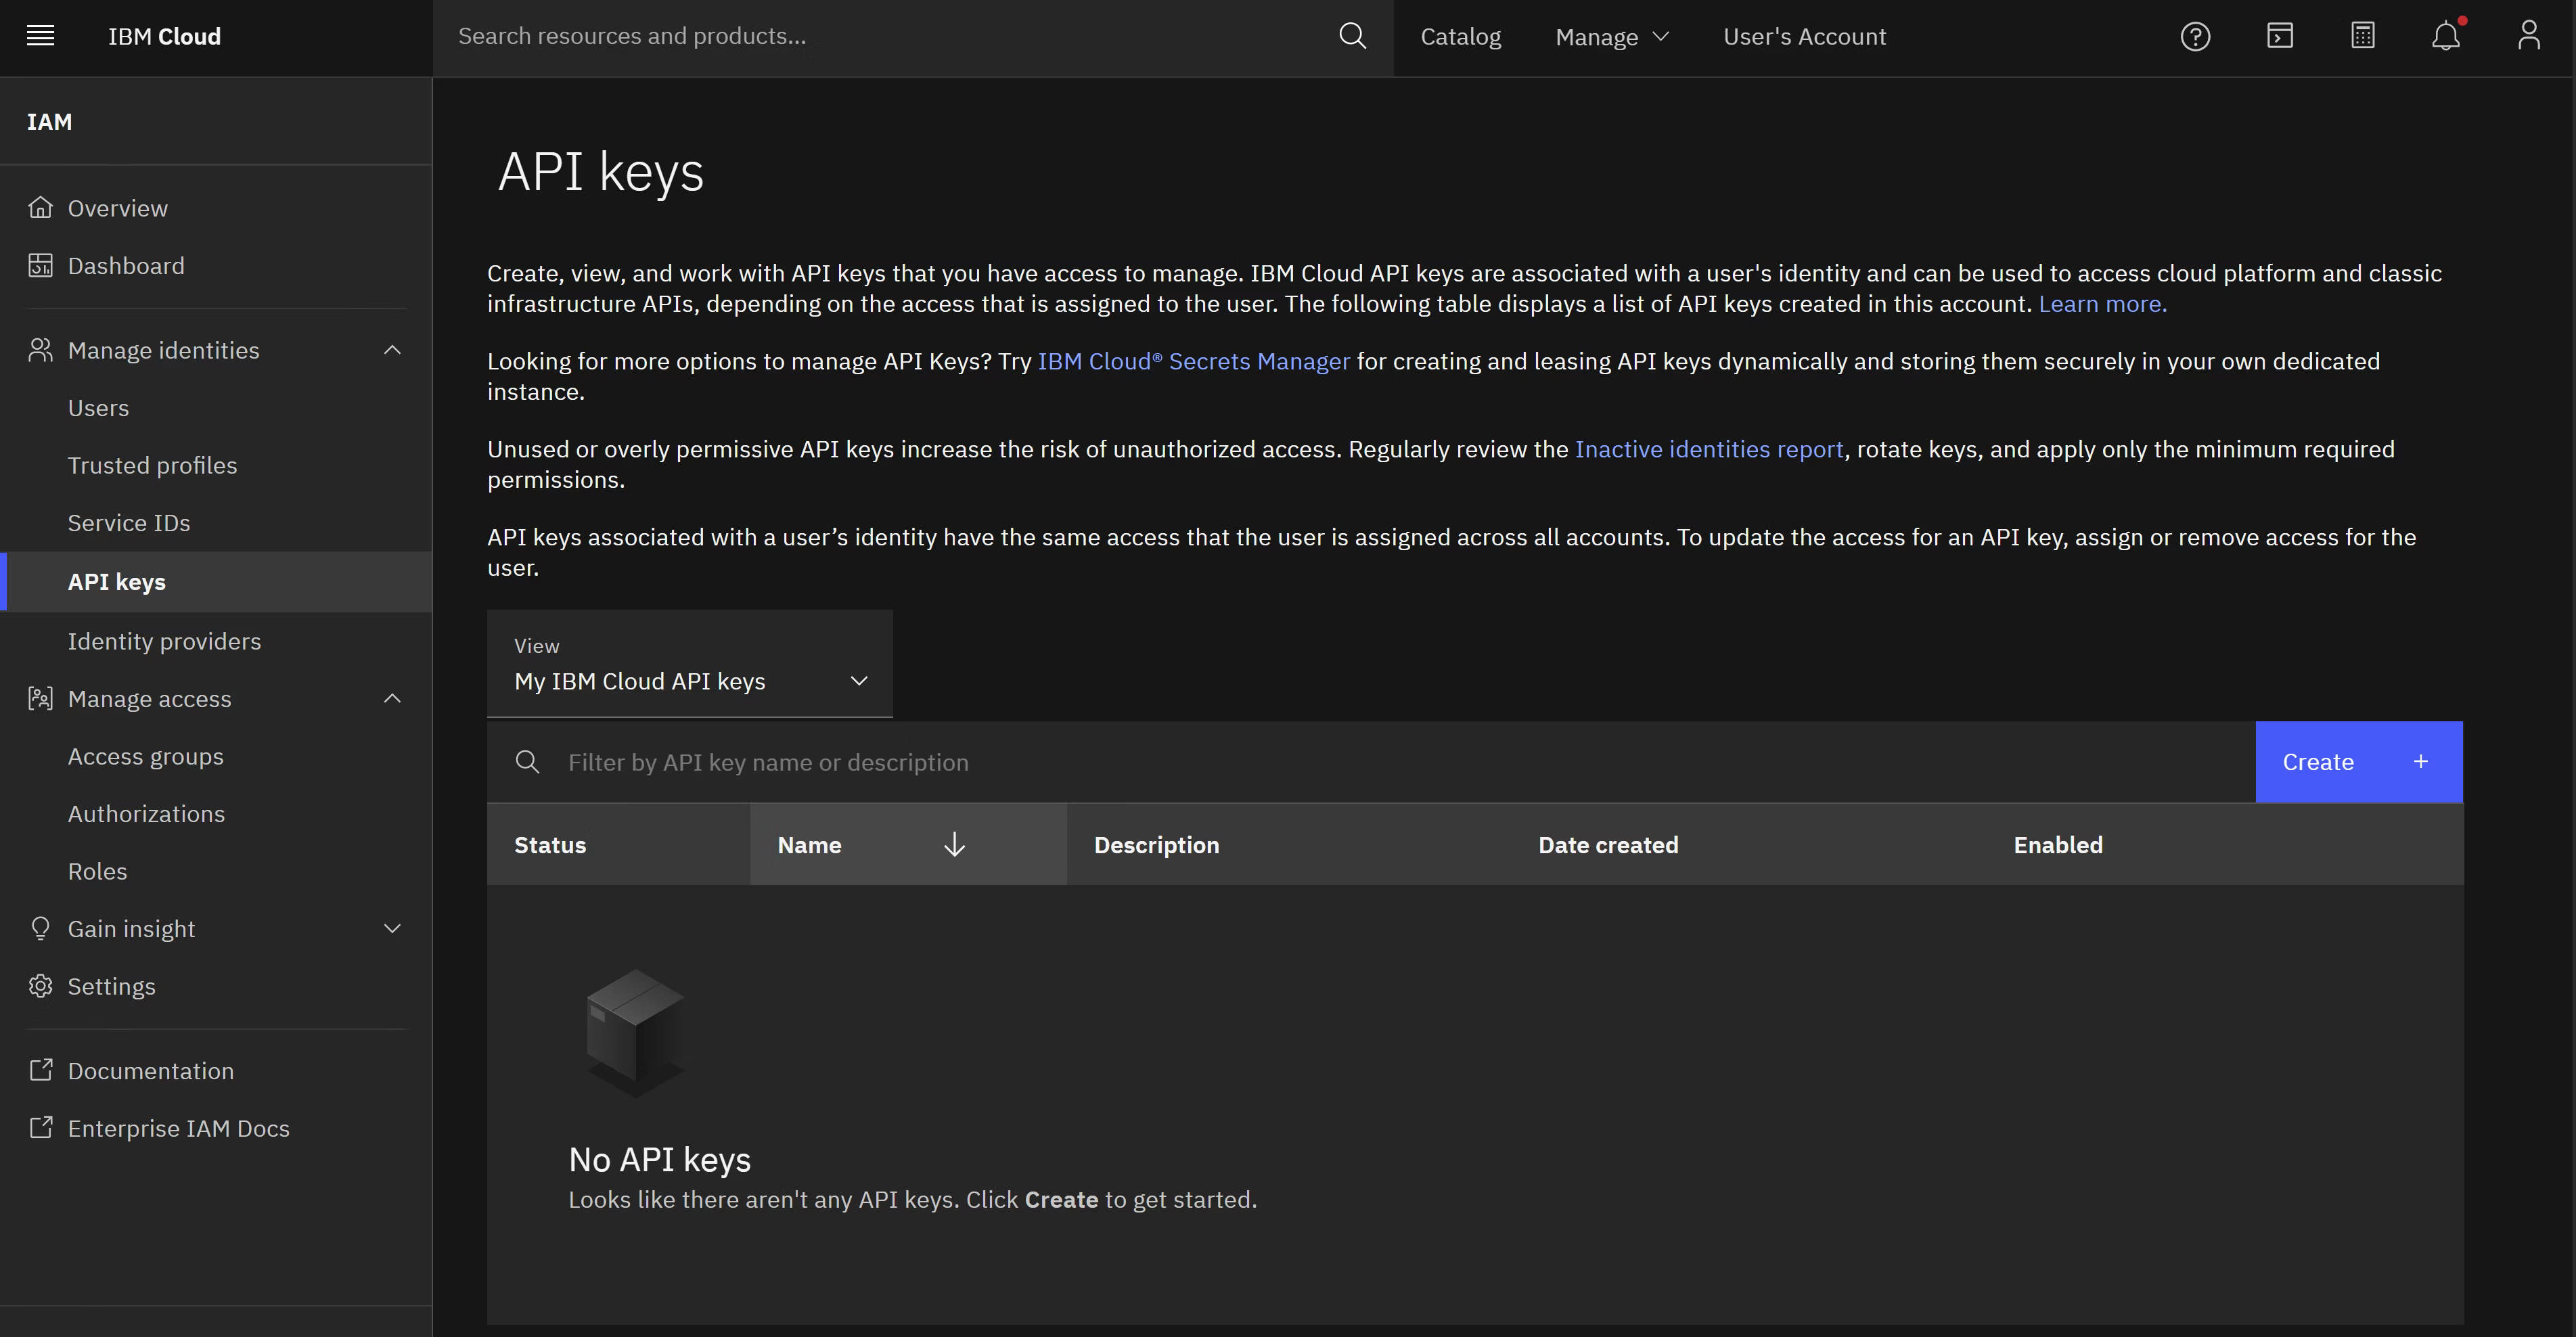
<br>
**7.)** Enter a name and description for your API key <br>
<br>
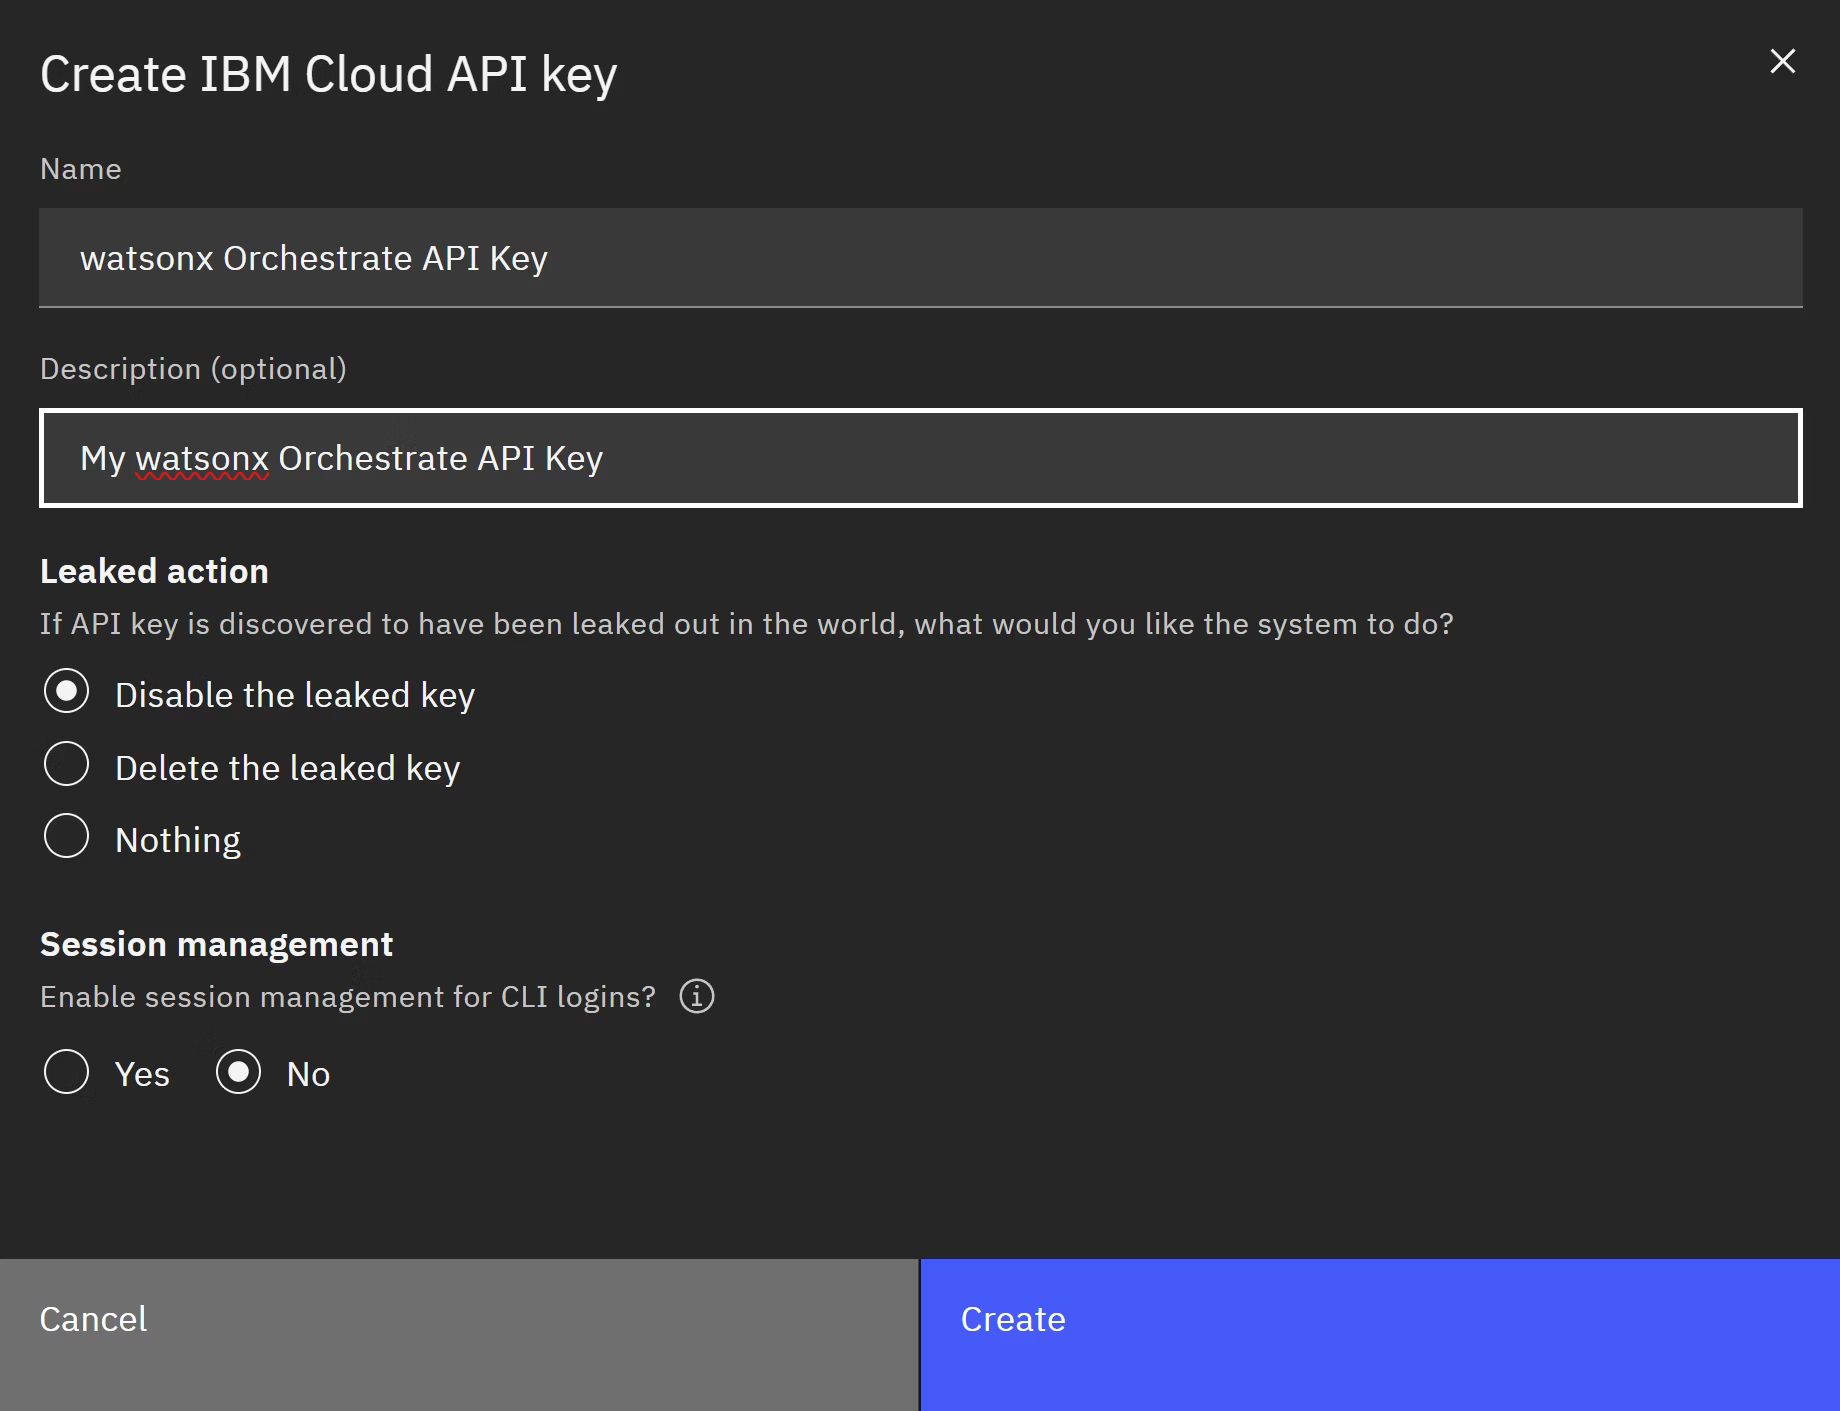
<br>
**8.)** Copy the API key and store it in a safe vault <br>
<br>
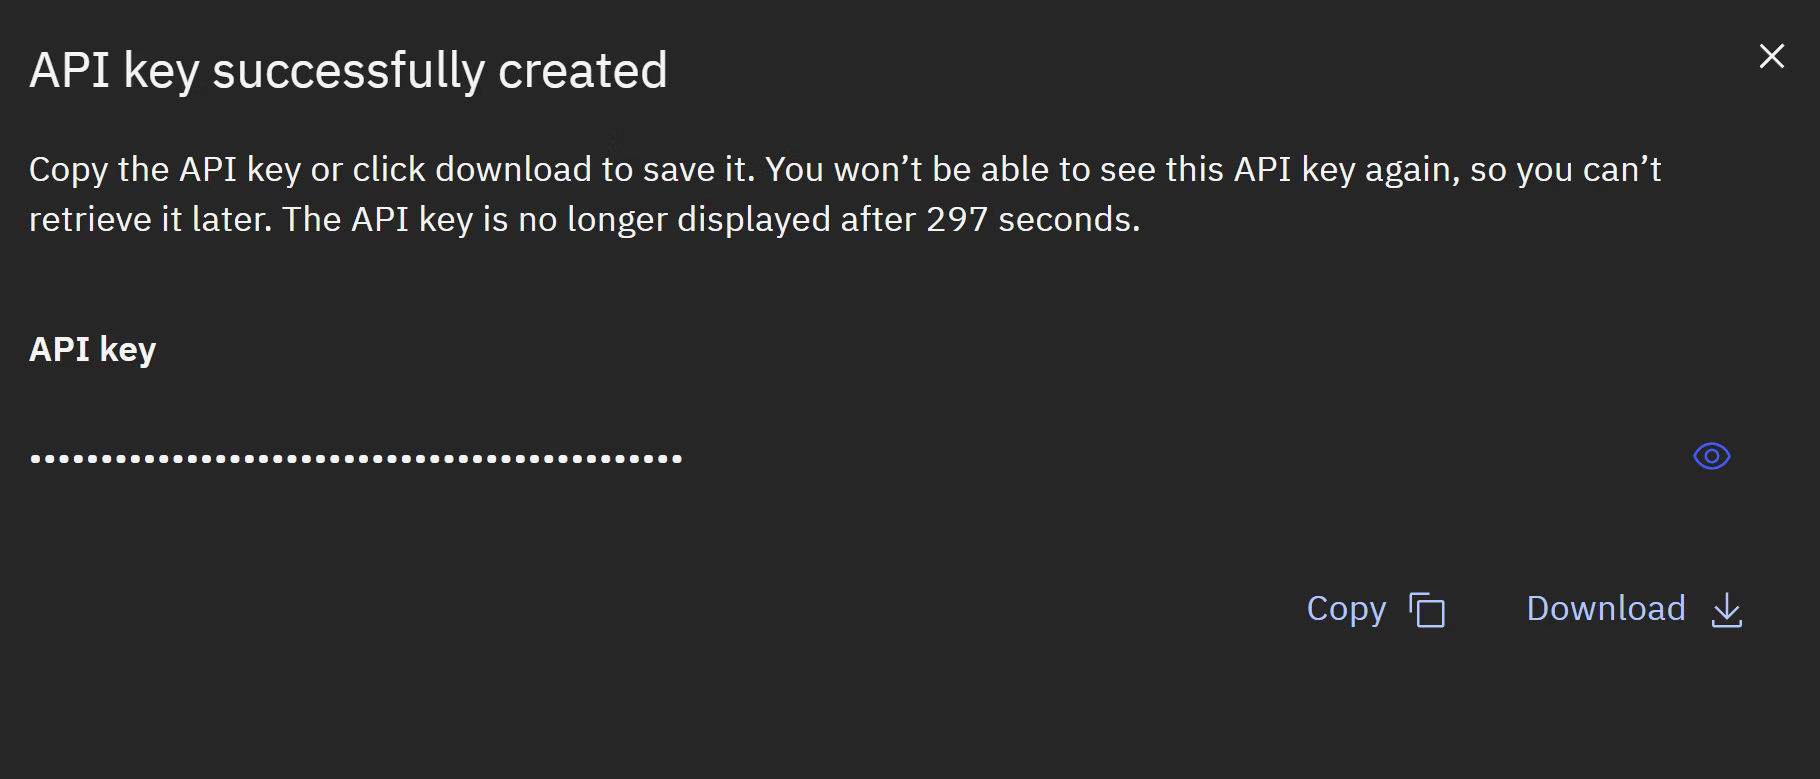
<br>

In [3]:
service_instance_url = ""
api_key = ""

**9.)** Add and activate an environment with the ADK CLI. Replace ```<environment-name>``` with an environment name of your choice, this will be your environment name used during the lab. Please choose a unique name like ```metlife_env_<your initials>```. This will allow you to differentiate your env from other individuals in the lab <br>

You can connect to local or remote environments. We are connecting to a remote environment hosted on IBM Cloud. More details [here](https://developer.watson-orchestrate.ibm.com/environment/initiate_environment)<br>

To view all environments within your watsonx orchestrate instance type ```orchestrate env list``` in the terminal. It will denote whether that env is a remote instance or hosted locally.

In [4]:
! orchestrate env list

[INFO] - Creating config file at location "/home/wsuser/.config/orchestrate/config.yaml"
[DEBUG] - Setting default config data
[WARNING] - No active environment is currently set. Use `orchestrate env activate` to set one
 local  http://localhost:4321   


If you want to remove an existing env you can using the below command<br>
```orchestrate env remove -n <env-name>```

In [5]:
# ! orchestrate env remove -n <env-name>
# ! echo y | orchestrate env remove -n <env-name>

Connect to your remote environment using the below commands. You will need to replace ```environment-name``` ```service-instance-url``` and ```api-key``` with their respectively values from earlier in the lab<br>

```
orchestrate env add -n <environment-name> -u <service-instance-url> --type ibm_iam
orchestrate env activate <environment-name> --api-key <api-key>
```
<br>

In [5]:
! orchestrate env add -n <environment-name> -u <service-instance-url> --type ibm_iam

[INFO] - Environment 'metlife_test' has been created


In [6]:
! orchestrate env list

[WARNING] - No active environment is currently set. Use `orchestrate env activate` to set one
 local         http://localhost:4321                                            
 metlife_test  https://api.us-south.watson-orchestrate.cloud.ibm.com/instanc…   


In [159]:
! orchestrate env activate <environment-name> --api-key <api-key>

[INFO] - Environment 'metlife_test' is now active


In [8]:
! orchestrate env list

 metlife_test  https://api.us-south.watson-orchestrate.cloud.ibm.com…  (active) 
 local         http://localhost:4321                                            


### 3.)  Create SRE Agent

#### The Problem

MetLife Insurance is striving to improve service reliability and enhance customer satisfaction by modernizing the operations behind its core insurance services—including policy management, claims processing, payments, and the customer portal. However, the Site Reliability Engineering (SRE) team currently faces significant challenges in maintaining seamless service delivery and minimizing downtime during system incidents.<br>

The incident management process is predominantly manual, requiring SREs to monitor disparate system dashboards, interpret performance metrics, analyze logs, and identify root causes before applying remediation. When services degrade or fail, it often leads to delays in detection and resolution, affecting both internal workflows and end-user experience.<br>

Moreover, the lack of intelligent automation in incident response extends resolution times, introduces operational inefficiencies, and increases the risk of prolonged service disruptions. This reactive approach limits the team's ability to proactively prevent issues or scale operations effectively. To summarize, some of the key challenges faced by SREs at MetLife Insurance include: <br>

•	**Manual and fragmented processes** slow down the detection, diagnosis, and resolution of service incidents.<br>
•	**Reliance on human expertise** to interpret logs and metrics delays response time during critical outages.<br>
•	**Lack of integrated tools** hinders rapid identification of root causes and effective execution of fixes.<br>
•	**Extended service downtime** negatively impacts customer experience and trust in digital insurance services.<br>
<br>
An intelligent, autonomous SRE AI Agent equipped with advanced observability, automated root cause analysis, and pre-defined remediation playbooks could dramatically improve system resilience—enabling faster, more reliable, and scalable operations while reducing the burden on human engineers.
<br>

#### Objective
MetLife Insurance plans to implement an AI-powered SRE Agent Assistant to support their Site Reliability Engineering (SRE) team in maintaining service reliability and minimizing system downtime. The goal is to create an AI-powered agentic solution that assists SREs in executing the following tasks:
<br>
*  **Check service health**<br>
   Check the health status of a service in the system.<br>
   Queries the service registry to retrieve current health metrics and determine if a service is functioning accordingly. This helps verify service availability, troubleshoot incidents, validate deployments, and assess the health ofupstream<br>
   downstream dependencies.<br>
*  **Restart services**<br>
  Perform a service restart to recover from degraded or unhealthy states.<br>
  Initiates a restart of the specified service—commonly used as a remediation action during incident response when a service is unhealthy.<br>
*  **View incident history**<br>
  Retrieve historical incident data for pattern analysis and reporting.<br>
  Fetches past incidents to identify recurring issues, support root cause analysis, and improve incident response over time.<br>
*  **Find unhealthy services**<br>
  List services that are degraded or unhealthy.<br>
  Enables quick identification of problematic services to prioritize investigation and resolution.<br>
*  **List all services**
  Return the current health status of all services.<br>
  Provides a unified view of overall system health, aiding in monitoring, incident management, and proactive maintenance.<br>

By automating these tasks, MetLife insurance aims to reduce operational overhead, accelerate incident response, and improve system resilience—ultimately enhancing customer experience and trust in their digital insurance services at scale.<br>
<br>
We're tracking 4 services (policy-api, claims-api, payment-api, customer-api). We have added some mock incident data for each service. You will notice in the lab that Claims-api and Payment-api are degraded and have open incidents.

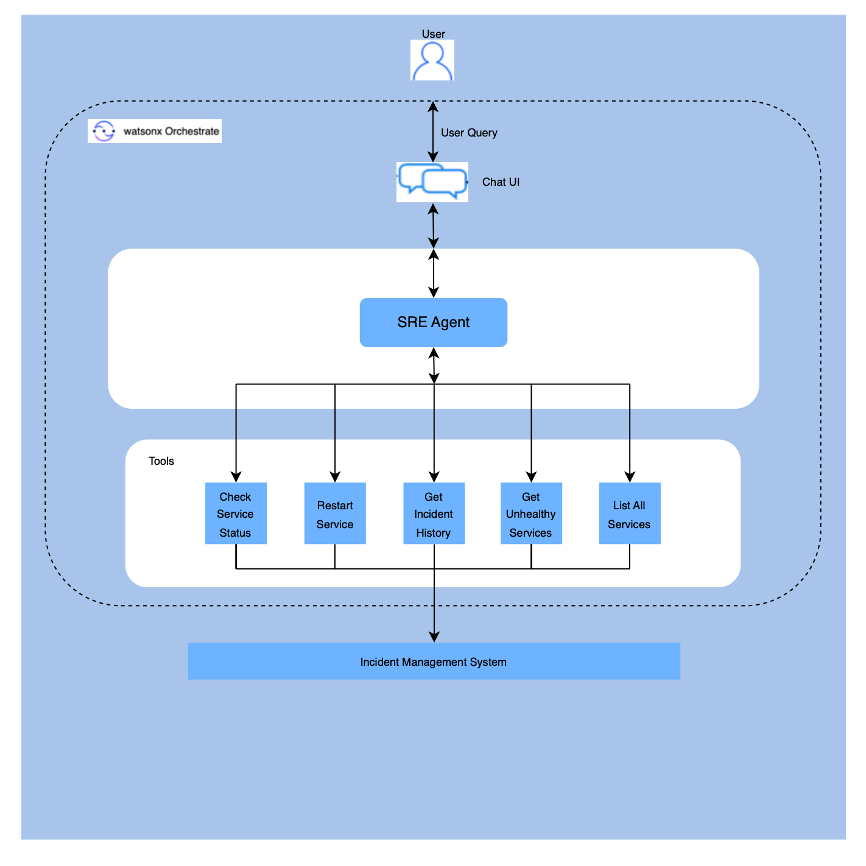

To view all capabilities of the watsonx Orchestrate ADK you can run ```orchestrate --help```

In [9]:
! orchestrate --help

                                                                                
 Usage: orchestrate [OPTIONS] COMMAND [ARGS]...                                 
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ --version                     Show the installed version of the ADK and      │
│                               Developer Edition Tags                         │
│ --debug                       Enable debug mode                              │
│ --install-completion          Install completion for the current shell.      │
│ --show-completion             Show completion for the current shell, to copy │
│                               it or customize the installation.              │
│ --help                        Show this message and exit.                    │
╰──────────────────────────────────────────────────────────────────────────────╯
╭─ Commands ────────────────

**1.)** To store all Agent and tool related code for the SRE Agent you must create a directory. <br>

Run ```ls``` you should see no files within your env

In [10]:
!ls

Make a directory using the ```mkdir``` command. This is the directory where your agent and its tools sit. We are creating an SRE Agent. You can give your directory a name associated with that like ```sre-metlife```

In [11]:
! mkdir sre-metlife

In [12]:
!ls

sre-metlife


**2.)** Open a text editor, such as Visual Studio Code or Notepad<br>
**3.)**  To create the agent, copy the following code. This defines the agent, its tools, knowledge base, instructions, llm, description, etc. Later you can make changes to this to see how it impacts your Agent performance. <br>

```yaml
spec_version: v1
kind: native
name: metlife_sre_helper
description: Simple SRE helper
style: default
llm: watsonx/meta-llama/llama-3-2-90b-vision-instruct
instructions: "Help users check service status, restart services get incident history, get unhealthy services, and list all services using the tools. Use the tools when asked questions about services, their history and availability. Provide as much detail as possible when answering questions about services while being crisp. Use the knowledge base to answer additional questions about the services. These questions can include : services purpose, key functions, risks, incident management best practices."
tools:
  - check_service_status
  - restart_service
  - get_incident_history
  - get_unhealthy_services
  - list_all_services
knowledge_base:
  - sre_knowledge_base
```

Paste the code in the text editor. Give your agent a unique name. The ```name``` listed in this file will be the name of your deployed agent. Please change the name with a unique name so you can differentiate your agent from other individuals within the lab. Otherwise you will be overwriting the same agent. Do the same with the name of the tools and knowledge base, by adding a post-fix like your initials. ```(e.g. check_service_status_df, sre_knowledge_base_df)``` Make sure you update the names in corresponding sections below.<br>

Save the file as ```sre_agent.yaml``` locally. 

You can run orchestrate models list to view all models available within watsonx orchestrate.

NOTE: The wxO development environment has also an embedded AI Gateway that you can use to connect and use also other LLMs with your agents you build here. In this lab we will just use the ones that watsonx.ai is offering out of the box, but more information how to use the AI Gateway is here

In [13]:
! orchestrate models list

[INFO] - Retrieving virtual-model models list...
[INFO] - Retrieving virtual-policies models list...
[INFO] - Retrieving watsonx.ai models list...
                                Available Models                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model                                 ┃ Description                          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ★                                     │ Llama-3-2-90b-vision-instruct is an  │
│ watsonx/meta-llama/llama-3-2-90b-vis… │ auto-regressive language model that  │
│                                       │ uses an optimized transformer        │
│                                       │ architecture.                        │
├───────────────────────────────────────┼──────────────────────────────────────┤
│ ★                                     │ Llama-3-405b-instruct is Meta's      │
│ watsonx/meta-llama/llama-3-405b-inst… │ l

**4.)** Upload the ```sre_agent.yaml``` file in the top right into watson Studio. Click **Upload asset to Project**, drag and drop or browse for the file to upload

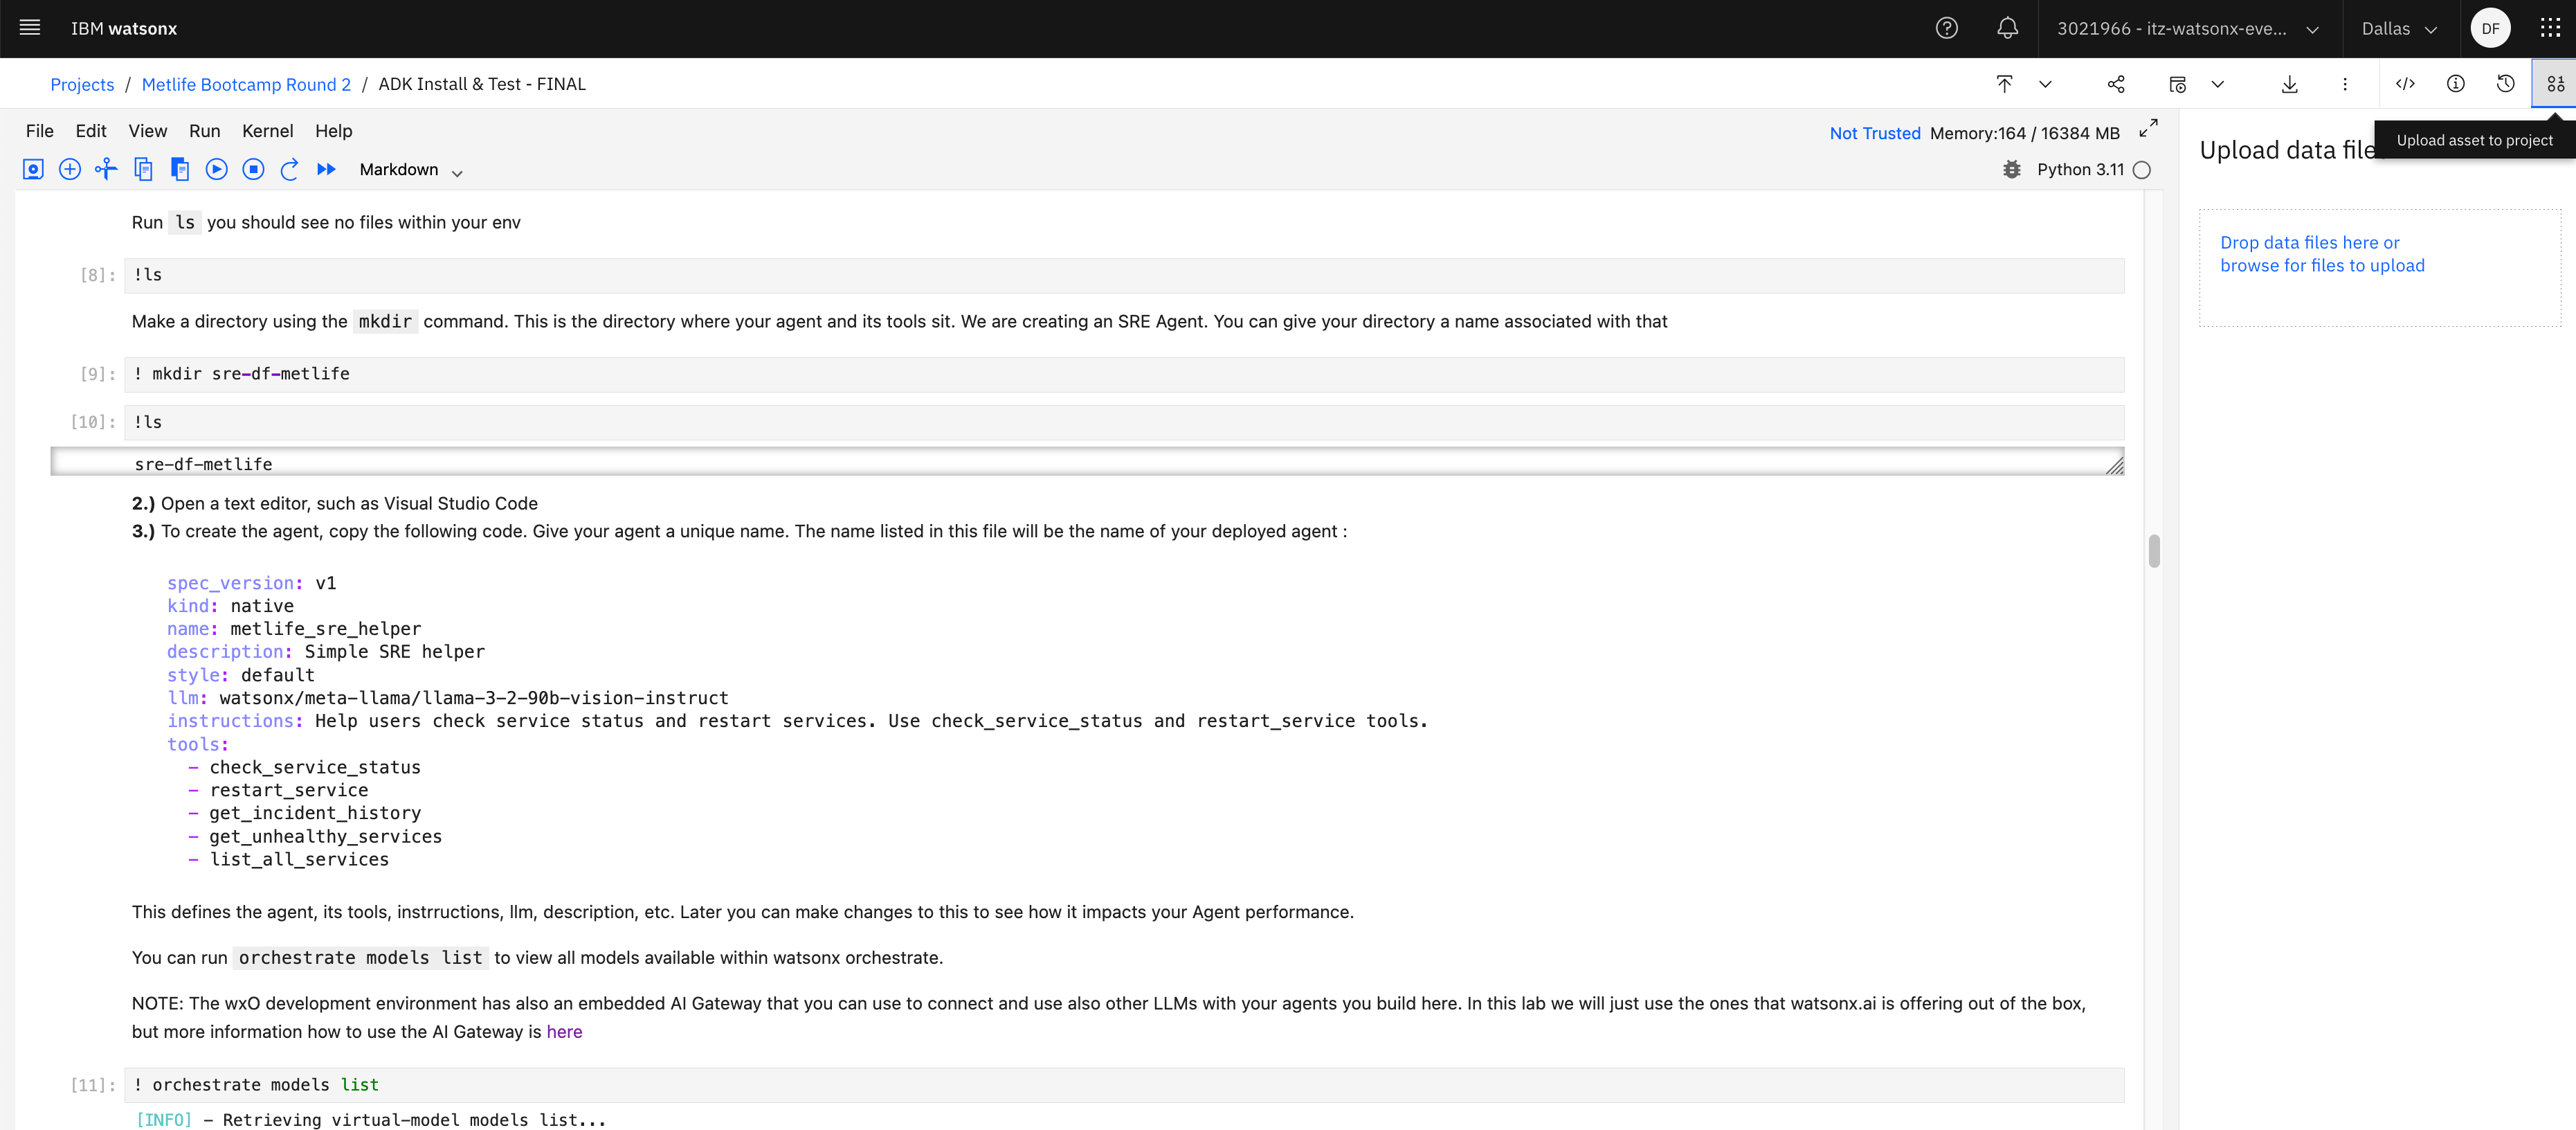

**5.)** Use **Code Snippets** on the right to load your yaml file in this notebook. <br>

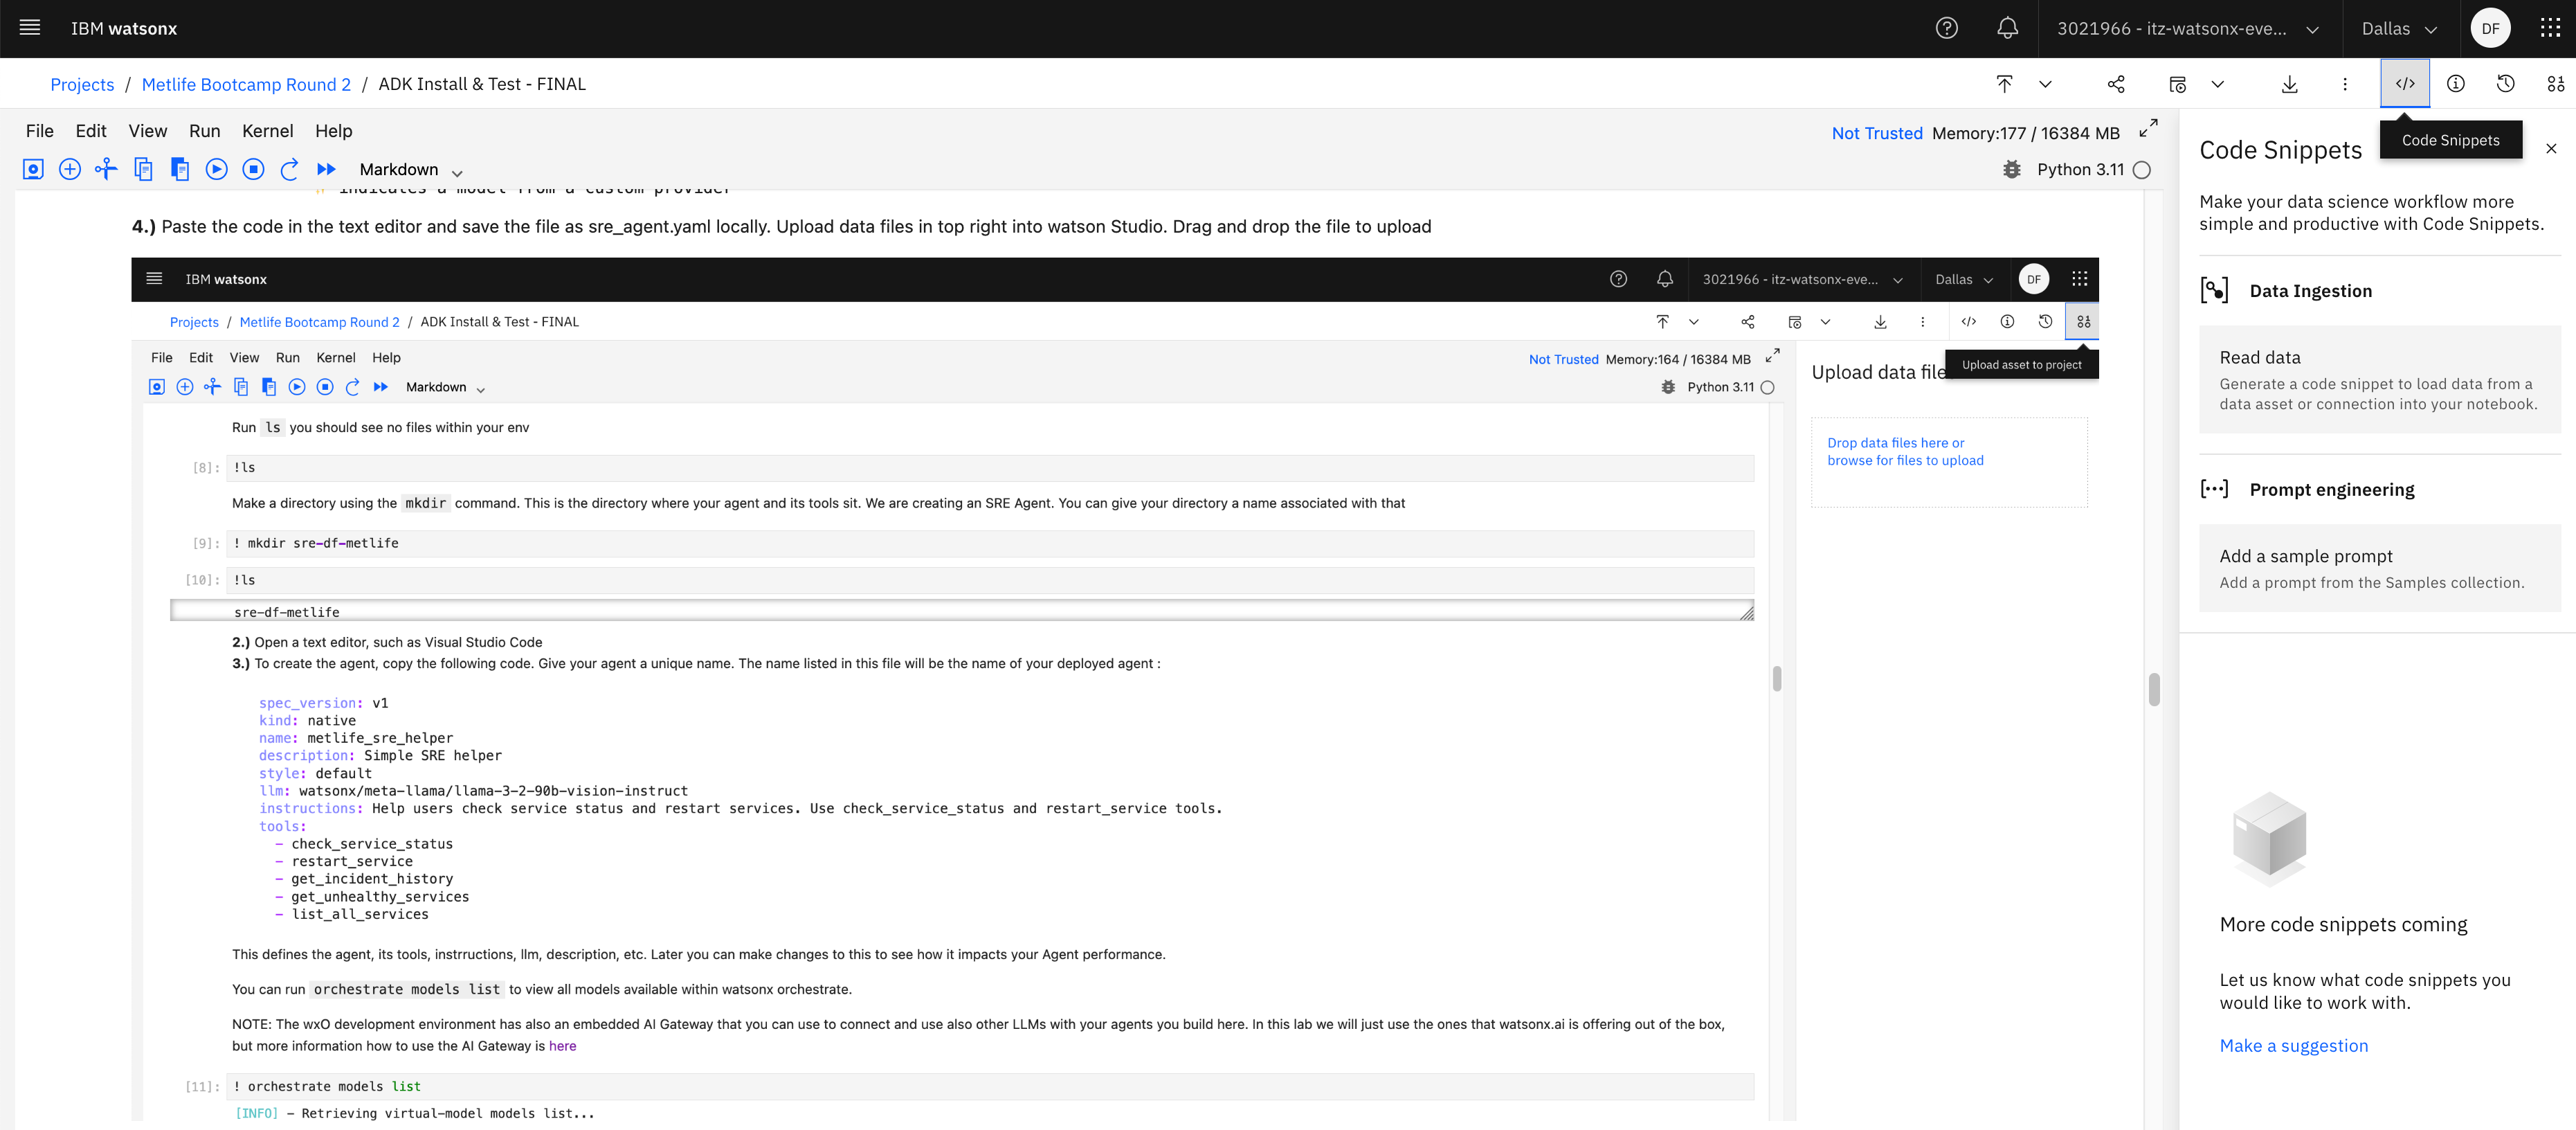

**6.)** Select **Read Data** under **Data Ingestion**. <br>

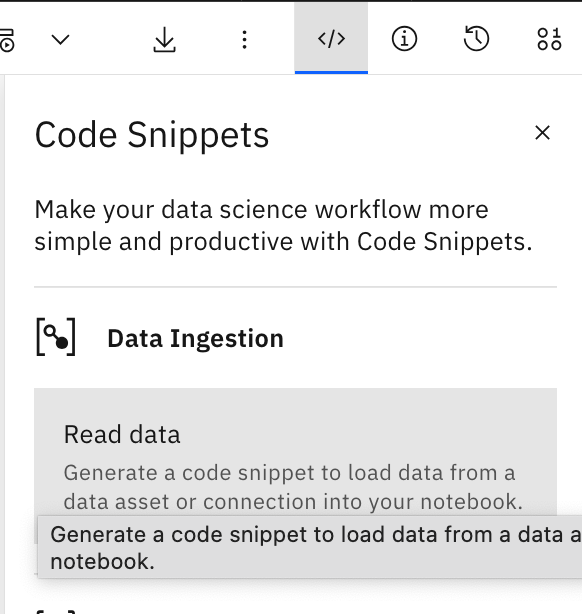
<br>
<br>
Then **Select data from Project** to select the yaml file that you uploaded.<br>
<br>
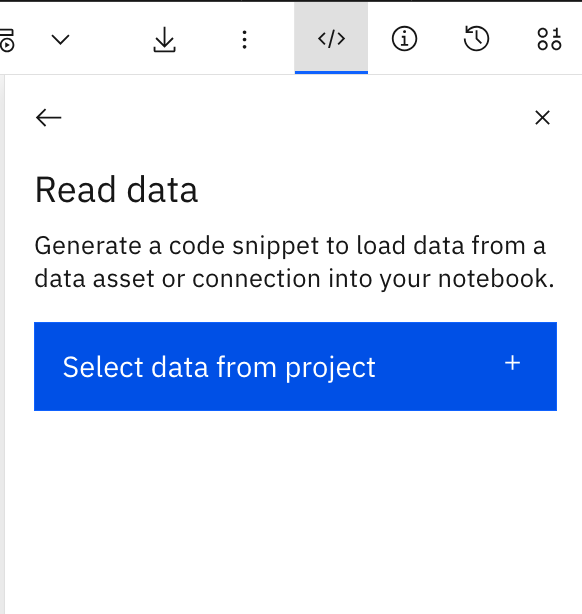

**7.)** Select **Data Asset** -> and then choose the SRE Agent yaml file that you uplpaded. Click the **Select** button in the bottom right. <br>

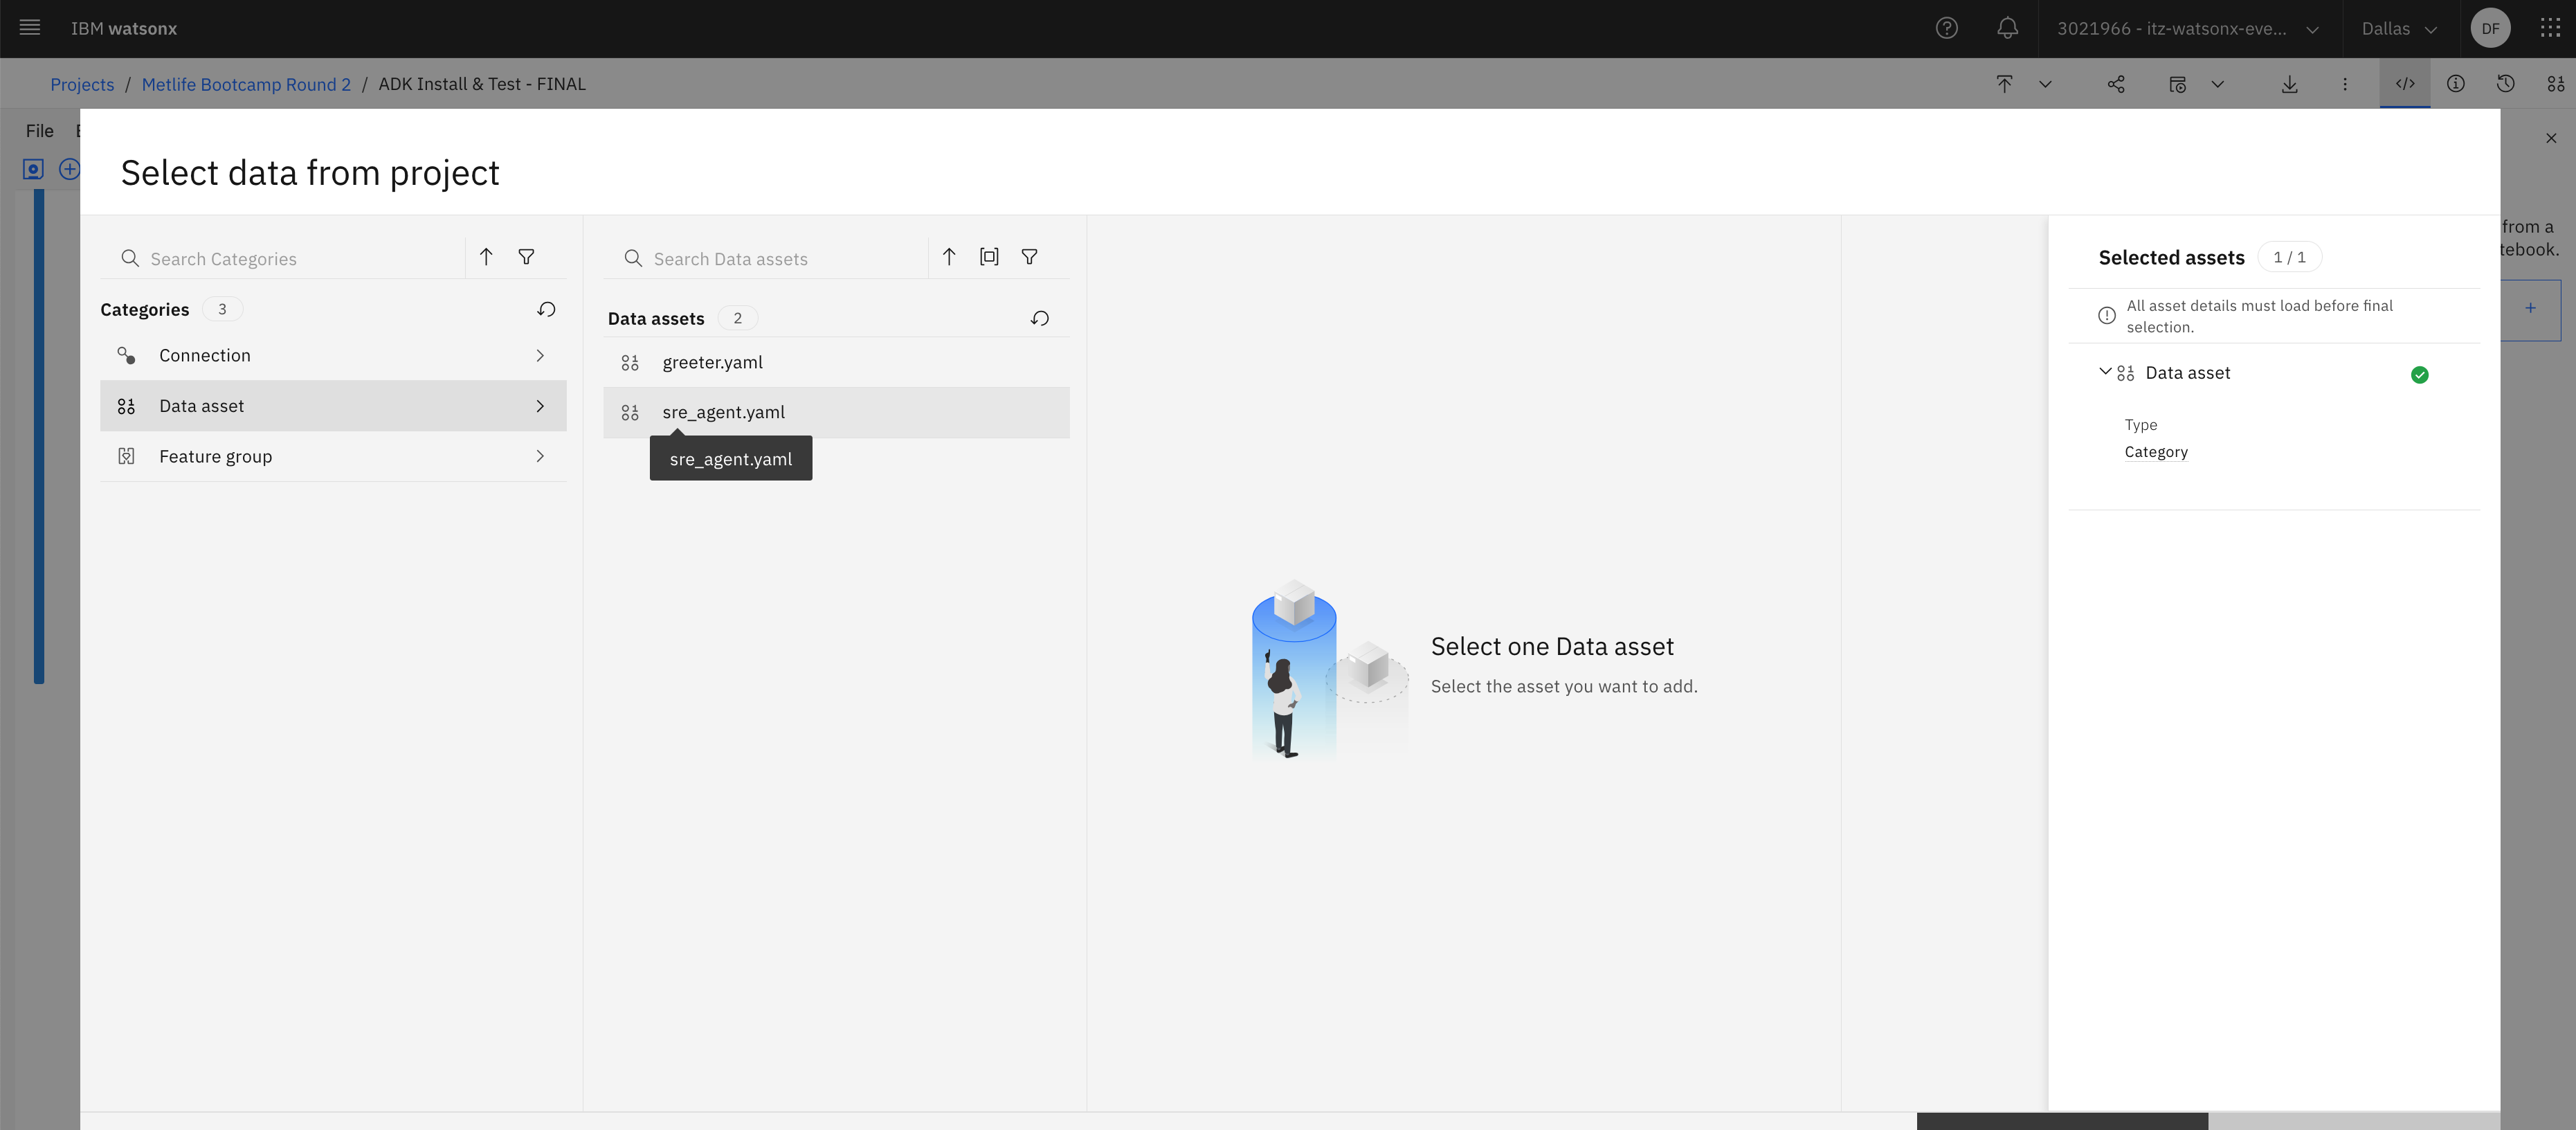

<br>

The next option will ask how you want to load the file. Select **load as** and choose **Credentials** from the drop down. Then select **Insert code to cell** or use the copy button to bring the code into the next cell

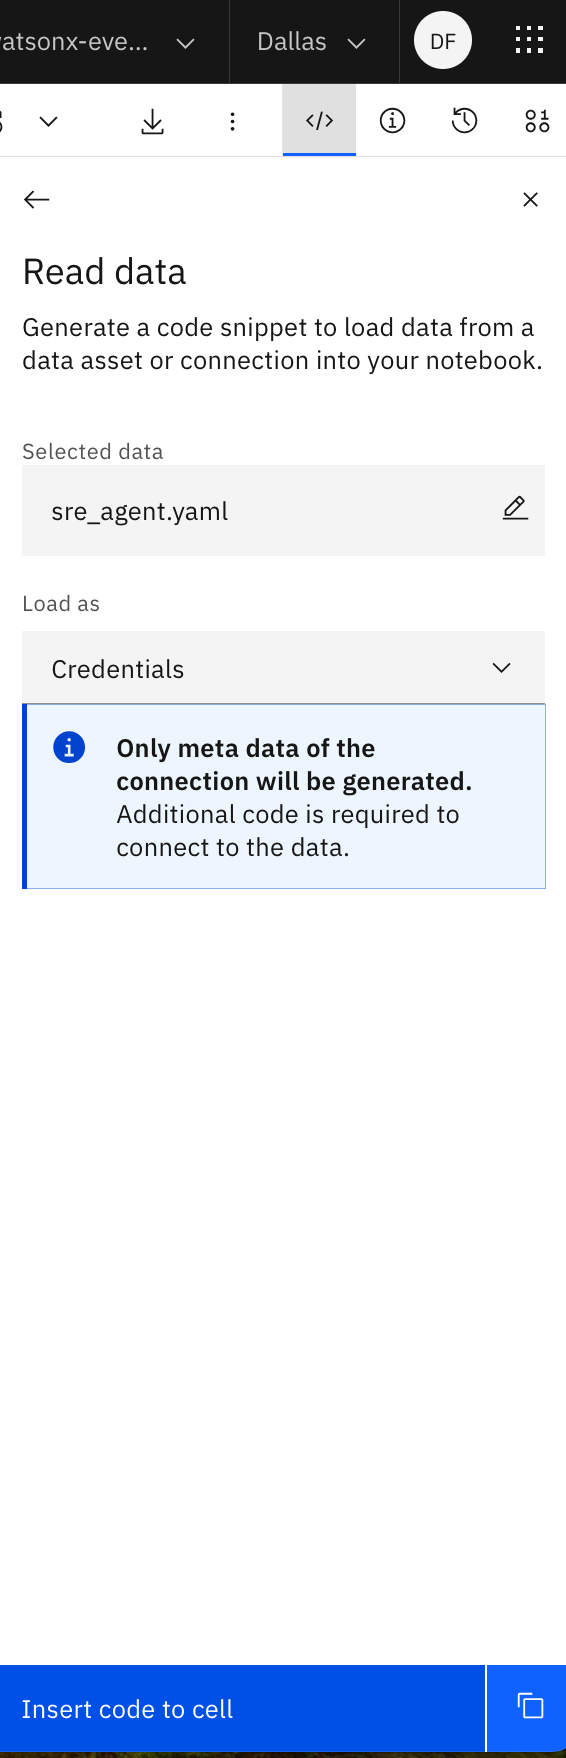

The cell will look similar to the block below : 

```python 
storage_metadata = {
    'IAM_SERVICE_ID': '',
    'IBM_API_KEY_ID': '',
    'ENDPOINT': '',
    'IBM_AUTH_ENDPOINT': '',
    'BUCKET': '',
    'FILE': ''
}
```

In [11]:
# @hidden_cell
# The following code contains metadata for a file in your project storage.
# You might want to remove secret properties before you share your notebook.

storage_metadata = {
    'IAM_SERVICE_ID': '',
    'IBM_API_KEY_ID': '',
    'ENDPOINT': '',
    'IBM_AUTH_ENDPOINT': '',
    'BUCKET': '',
    'FILE': ''
}

**8.)** Use the below ```cos_client``` code block with the credentials you copied from above to create a variable to connect to the Cloud Object Storage Client. Then use the ```download_file``` function to download the ```<sre_agent>.yaml``` file into the environment

In [190]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=storage_metadata['IBM_API_KEY_ID'],
    ibm_auth_endpoint=storage_metadata['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=storage_metadata['ENDPOINT'])

In [191]:
cos_client.download_file(Bucket = storage_metadata['BUCKET'],
                         Key = storage_metadata['FILE'], 
                         Filename = storage_metadata['FILE'])

**9.)** Running ```ls``` you can see all files within the environment. We need to store the ```<sre_agent>.yaml``` inside the ```<sre-directory>``` folder. All tools/files associated with the agent and its tools must be stored within the agent directory. 

In [192]:
!ls

 __pycache__	 'SRE Incident Management Best Practices.pdf'   sre-metlife
 sre_agent.yaml   sre_knowledge_base.py


In [193]:
!ls -l ./sre-metlife/

total 8
-rw-rw---- 1 wsuser wscommon  785 Oct 20 17:00 sre_agent.yaml
drwxrwx--- 3 wsuser wscommon 4096 Oct 20 18:00 tools


Run the below command to load the file within this env to ensure it looks correct. Replace ```file_name``` with the name of your ```<sre_agent>.yaml``` file

In [194]:
import yaml
from IPython.display import display, Markdown

# file_name = "<sre_agent>.yaml"
file_name = "sre_agent.yaml"

with open(file_name, "r") as file:
    data = yaml.safe_load(file)

formatted_yaml = yaml.dump(data, sort_keys=False, default_flow_style=False)
display(Markdown(f"```yaml\n{formatted_yaml}\n```"))

```yaml
spec_version: v1
kind: native
name: metlife_sre_helper
description: Simple SRE helper
style: default
llm: watsonx/meta-llama/llama-3-2-90b-vision-instruct
instructions: 'Help users check service status, restart services get incident history,
  get unhealthy services, and list all services using the tools. Use the tools when
  asked questions about services, their history and availability. Provide as much
  detail as possible when answering questions about services while being crisp. Use
  the knowledge base to answer additional questions about the services. These questions
  can include : services purpose, key functions, risks, incident management best practices.'
tools:
- check_service_status
- restart_service
- get_incident_history
- get_unhealthy_services
- list_all_services
knowledge_base:
- sre_knowledge_base

```

Move ```<sre_agent>.yaml``` inside the ```sre-metlife``` folder. 

In [196]:
!mv sre_agent.yaml ./sre-metlife/

In [38]:
!ls -l ./sre-metlife/

total 8
-rw-rw---- 1 wsuser wscommon  785 Oct 20 17:00 sre_agent.yaml
drwxrwx--- 2 wsuser wscommon 4096 Oct 20 16:21 tools


**10.)** Now that we have defined our Agent, we must define the corresponding tools, and knowledge base.<br>

With the ADK, you can create a knowledge bases for your agents, either by connecting to your own ElasticSearch or Milvus instance, or by uploading your documents.<br>

If you don’t have an existing Milvus or Elasticsearch instance to connect to, you can create a knowledge base by simply uploading your documents. These documents will be ingested into the built-in Milvus instance, which will serve as the backend for your knowledge base. The supported documents must follow these requirements:

    Each file must have a unique name.
    A single batch can include up to 20 files, with a total size limit of 30 MB.
    The maximum file size for .docx, .pdf, .pptx, and .xlsx files is 25 MB.
    The maximum file size for .csv, .html, and .txt files is 5 MB.

Upload the ```SRE Incident Management Best Practices.pdf``` file from the lab zip file in the top right into watson Studio like you did above. Click Upload asset to Project, drag and drop or browse for the file to upload<br>

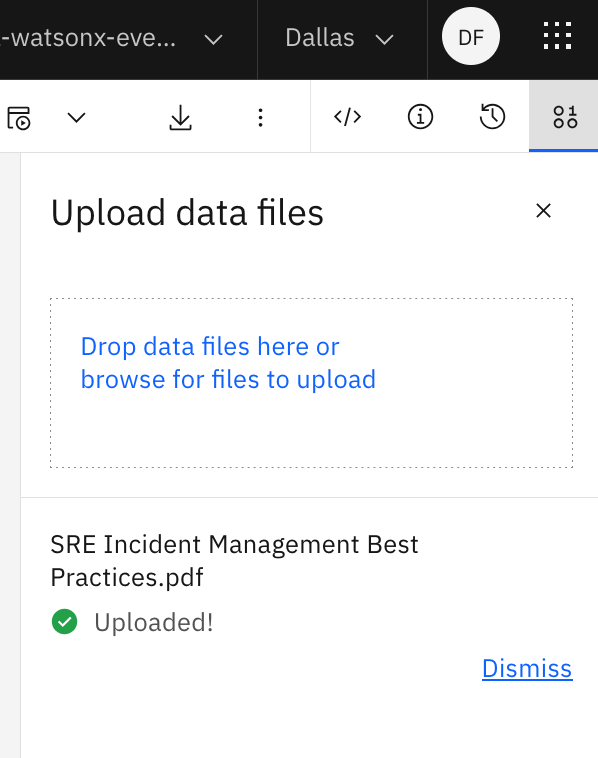

**11.)** Load the file locally using the same ```storage_metadata``` details from above. Update the name of the file to the name of the pdf ```SRE Incident Management Best Practices.pdf```

In [39]:
pdf_file = "SRE Incident Management Best Practices.pdf"

cos_client.download_file(Bucket = storage_metadata['BUCKET'],
                         Key = pdf_file, 
                         Filename = pdf_file)

In [66]:
!ls

'SRE Incident Management Best Practices.pdf'   sre-metlife


**12.)** Define the knowledge base and upload the pdf file. Change the ```kb_name``` to the ```knowledge_base``` name you defined above. Make sure the document in the ```documents``` argument match the locally downloaded pdf.<br>

Save the configuration details in a ```sre_knowledge_base.py``` file using the ```%%writefile``` command

The embedding model can be either a model hosted on watsonx.ai or a custom model of type embedding. You can see more details on Creating a Knowledge base with the ADK [here](https://developer.watson-orchestrate.ibm.com/knowledge_base/build_kb#creating-knowledge-bases)<br>

In [129]:
%%writefile ./sre_knowledge_base.py

from ibm_watsonx_orchestrate.agent_builder.knowledge_bases.knowledge_base import KnowledgeBase

kb_name = "sre_knowledge_base"

knowledge_base = KnowledgeBase(
   name=kb_name,
   description="SRE Incident Management Best Practices for MetLife Insurance. This includes an overview of the Core services and apis with their purpose and key functions. The core services include : policy-api, claims-api, payment-api, customer-api. This document also includes detailed best practices for incident management.",
   documents=["./SRE Incident Management Best Practices.pdf"]
   # vector_index={"embeddings_model_name": "ibm/slate-125m-english-rtrvr-v2"}
)

Overwriting ./sre_knowledge_base.py


In [130]:
!ls

'SRE Incident Management Best Practices.pdf'   sre-metlife
 sre_knowledge_base.py


**13.)** Import the created Knowledge Base using the below command. Replacing the ```<knowledge-base-file-path>``` with the location of your knowledge base configuration file

```!orchestrate knowledge-bases import -f <knowledge-base-file-path>```

In [131]:
!orchestrate knowledge-bases import -f ./sre_knowledge_base.py

[INFO] - Successfully imported knowledge base 'sre_knowledge_base'


**14.)** Check the status of the Knowledge Base Creation. This will include a Ready property, which denotes whether your index has been successfully created and the knowledge base is ready to use. Run the below command and change ```my-base-name``` to the name of your knowledge base ```sre_knowledge_base```

```orchestrate knowledge-bases status --name my-base-name```

Once the ```Ready``` status is ```True``` you may continue to the next step

In [135]:
! orchestrate knowledge-bases status --name sre_knowledge_base

┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃         ┃         ┃         ┃       ┃         ┃ Built   ┃          ┃         ┃
┃         ┃         ┃ Priori… ┃       ┃ Built   ┃ In      ┃          ┃         ┃
┃         ┃         ┃ Built   ┃       ┃ In      ┃ Index   ┃          ┃         ┃
┃         ┃         ┃ In      ┃       ┃ Index   ┃ Status  ┃ Documen… ┃         ┃
┃ Name    ┃ Descri… ┃ Index   ┃ Ready ┃ Status  ┃ Msg     ┃ (1)      ┃ Id      ┃
┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ sre_kn… │ SRE     │ True    │ True  │ ready   │ Index   │ SRE      │ 5b96e9… │
│         │ Incide… │         │       │         │ refres… │ Incident │         │
│         │ Manage… │         │       │         │         │ Managem… │         │
│         │ Best    │         │       │         │         │ Best     │         │
│         │ Practi… │         │       │         │         │ Practic… │         │
│         │ for     │       

To view all knowledge bases run the below command

In [136]:
!orchestrate knowledge-bases list

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Name               ┃ Description            ┃ App ID ┃ ID                    ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ sre_knowledge_base │ SRE Incident           │        │ 5b96e9e4-09e3-4e87-bd │
│                    │ Management Best        │        │ d4-3c0251036093       │
│                    │ Practices for MetLife  │        │                       │
│                    │ Insurance. This        │        │                       │
│                    │ includes an overview   │        │                       │
│                    │ of the Core services   │        │                       │
│                    │ and apis with their    │        │                       │
│                    │ purpose and key        │        │                       │
│                    │ functions. The core    │        │                       │
│                    │ servi

**15.)** The last part of the agent to create and define are the tools. We have created SRE Tools that allow you to check the health of services and incidents related to site reliability. 5 tools have been created : 
<br><br>

*  **Check service health**<br>
   Check the health status of a service in the system.<br>
   Queries the service registry to retrieve current health metrics and determine if a service is functioning accordingly. This helps verify service availability, troubleshoot incidents, validate deployments, and assess the health ofupstream<br>
   downstream dependencies.<br>
*  **Restart services**<br>
  Perform a service restart to recover from degraded or unhealthy states.<br>
  Initiates a restart of the specified service—commonly used as a remediation action during incident response when a service is unhealthy.<br>
*  **View incident history**<br>
  Retrieve historical incident data for pattern analysis and reporting.<br>
  Fetches past incidents to identify recurring issues, support root cause analysis, and improve incident response over time.<br>
*  **Find unhealthy services**<br>
  List services that are degraded or unhealthy.<br>
  Enables quick identification of problematic services to prioritize investigation and resolution.<br>
*  **List all services**
  Return the current health status of all services.<br>
  Provides a unified view of overall system health, aiding in monitoring, incident management, and proactive maintenance.<br>

<br>
Tools can be created within your own environment using Python. After loading these tools and testing, you can make edits to these tools later and see how it impacts the performance of your Agent.<br><br>

To connect your developed tools to your agent you must save it within your agent directory ```<sre-directory>```. Make a ```tools``` directory within ```<sre-directory>``` where you can store your tools. Give your tool names a unique name to differentiate it from other individuals doing the lab, do this by changing the name of the tool functions

In [137]:
!ls

 __pycache__				       sre_knowledge_base.py
'SRE Incident Management Best Practices.pdf'   sre-metlife


In [141]:
!mkdir ./sre-metlife/tools

In [142]:
!ls -l sre-metlife/

total 12
-rw-rw---- 1 wsuser wscommon  649 Oct 20 17:50 knowledge_base.py
-rw-rw---- 1 wsuser wscommon  785 Oct 20 17:00 sre_agent.yaml
drwxrwx--- 2 wsuser wscommon 4096 Oct 20 18:00 tools


**16.)** Use the below code to save the tools functions as a python file ```sre_tools.py```. in the ```<sre-directory>``` folder. 

It is recommended to include only a single @tool annotated function per file so that tools can be imported independently. However, for the sake of this lab you can import all within this one file. Please run the below cell to import the distinct tools. If you have changed the name of your ```<sre-directory>``` make sure to update in the python command : 
```python
%%writefile ./<sre-directory>/tools/sre_tools.py
``` 
To ensure your tools are distinct from other individuals in the lab, rename the python functions with your initial or some other postfix. See an example of that below : 
```python
@tool
def list_all_services_df() -> dict:
    """Return the current health status of all services."""
    return SERVICES_DATA
```

In [143]:
%%writefile ./sre-metlife/tools/sre_tools.py
from ibm_watsonx_orchestrate.agent_builder.tools import tool
from typing import Optional

SERVICES_DATA = {
    "policy-api": {
        "status": "healthy",
        "uptime": "99.9%",
        "response_time": "45ms",
        "last_restart": "2025-10-01 08:30:00",
        "requests_per_min": 1250
    },
    "claims-api": {
        "status": "degraded",
        "uptime": "98.5%",
        "response_time": "340ms",
        "last_restart": "2025-10-12 14:20:00",
        "requests_per_min": 450,
    },
    "payment-api": {
        "status": "degraded",
        "uptime": "100%",
        "response_time": "23ms",
        "last_restart": "2025-09-12 10:00:00",
        "requests_per_min": 890
    },
    "customer-api": {
        "status": "healthy",
        "uptime": "99.8%",
        "response_time": "52ms",
        "last_restart": "2025-09-15 10:00:00",
        "requests_per_min": 1850,
    },
    
}

INCIDENT_HISTORY = [
    {
        "incident_id": "INC-1755584102",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "critical",
        "status": "open",
        "title": "Claims API experiencing high error rates",
        "detected_at": "2025-10-12 14:20:02",
        "resolved_at": None,
        "duration_minutes": None,
        "root_cause": "Under investigation - database connection pool exhaustion suspected"
    },
    {
        "incident_id": "INC-1755582782",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "critical",
        "status": "resolved",
        "title": "Claims API slow response times",
        "detected_at": "2025-10-10 09:23:02",
        "resolved_at": "2025-10-10 10:15:00",
        "duration_minutes": 52,
        "root_cause": "Memory leak causing service degradation"
    },
    {
        "incident_id": "INC-1755570602",
        "service": "policy-api",
        "application": "metlife-policy-management",
        "severity": "high",
        "status": "resolved",
        "title": "Policy API response time degradation",
        "detected_at": "2025-09-28 15:00:02",
        "resolved_at": "2025-09-28 15:45:15",
        "duration_minutes": 45,
        "root_cause": "Database query optimization needed for policy lookups"
    },
    {
        "incident_id": "INC-1755529802",
        "service": "customer-api",
        "application": "metlife-customer-portal",
        "severity": "medium",
        "status": "resolved",
        "title": "Customer API intermittent timeouts",
        "detected_at": "2025-09-20 11:40:02",
        "resolved_at": "2025-09-20 12:25:20",
        "duration_minutes": 45,
        "root_cause": "Third-party CRM API timeout cascading failures"
    },
    {
        "incident_id": "INC-1755511562",
        "service": "payment-api",
        "application": "metlife-payment-gateway",
        "severity": "critical",
        "status": "resolved",
        "title": "Payment API processing failures",
        "detected_at": "2025-09-10 08:36:02",
        "resolved_at": "2025-09-10 09:15:45",
        "duration_minutes": 40,
        "root_cause": "Payment gateway configuration error after deployment"
    },
    {
        "incident_id": "INC-1755600000",
        "service": "payment-api",
        "application": "metlife-payment-gateway",
        "severity": "high",
        "status": "open", 
        "title": "Payment API experiencing intermittent timeouts",
        "detected_at": "2025-10-14 08:15:00",
        "resolved_at": None,
        "duration_minutes": None,
        "root_cause": "Under investigation - possible network connectivity issues"
    },
    {
        "incident_id": "INC-1755490000",
        "service": "claims-api",
        "application": "metlife-claims-processing",
        "severity": "high",
        "status": "resolved",
        "title": "Claims API batch processing delays",
        "detected_at": "2025-09-05 14:15:00",
        "resolved_at": "2025-09-05 15:45:00",
        "duration_minutes": 90,
        "root_cause": "Batch job resource contention with real-time API"
    },
    {
        "incident_id": "INC-1755450000",
        "service": "policy-api",
        "application": "metlife-policy-management",
        "severity": "medium",
        "status": "resolved",
        "title": "Policy API elevated error rates",
        "detected_at": "2025-08-28 10:20:00",
        "resolved_at": "2025-08-28 11:10:00",
        "duration_minutes": 50,
        "root_cause": "Redis cache failure causing database overload"
    },
    {
        "incident_id": "INC-1755400000",
        "service": "customer-api",
        "application": "metlife-customer-portal",
        "severity": "low",
        "status": "resolved",
        "title": "Customer API minor performance degradation",
        "detected_at": "2025-08-22 16:05:00",
        "resolved_at": "2025-08-22 16:35:00",
        "duration_minutes": 30,
        "root_cause": "Temporary network latency to authentication service"
    }
]

@tool
def check_service_status(service_name: str) -> dict:
    """
    Check the health status of a service in the system.

    Queries the service registry to retrieve current health metrics and determine
    if a service is functioning accordingly. Use this to verify
    service availability, troubleshoot incidents, validate deployments, and assess
    the health of upstream/downstream dependencies.

    The health status response may include:
    - Service state (healthy, degraded, unhealthy, unknown)
    - Response latency and availability metrics
    - Uptime and last check timestamp
    - Dependency health status
    
    *Important*: Service names must use hyphen-separated format. If you have
    a multi-word service name with spaces (e.g., "policy api"), convert it to
    hyphenated format (e.g., "policy-api") before querying.
    """
    return SERVICES_DATA.get(service_name, {"error": "Service not found"})

@tool
def restart_service(service_name: str) -> dict:
    """
    Perform a service restart to recover from degraded or unhealthy states.
    Initiates a restart of the specified service, typically used to resolve issues. 
    This is a common remediation action during incident response
    when a service is unhealthy.

    """
    if service_name not in SERVICES_DATA:
        return {"error": "Service not found"}
    return {
        "service": service_name,
        "status": "success",
        "message": f"{service_name} restarted successfully"
    }

@tool
def get_incident_history(service_name: Optional[str] = None, days: int = 7) -> dict:
    """
    Retrieve historical incident data for pattern analysis and reporting.
    
    Fetches past incidents to identify recurring issues. Helps predict future issues and improve incident response processes.
    
    Use cases:
    - Identifying recurring problems requiring permanent fixes
    - Post-incident reviews and trend analysis
    - Capacity planning and risk assessment
    
    Args:
        service_name: Optional hyphenated service name to filter incidents
        days: Number of days of history to retrieve (default: 7, max: 90)
    
    Returns:
        dict: Historical incident data with timestamps, severity, and resolution time
    """
    incidents = INCIDENT_HISTORY.copy()
    
    if service_name:
        incidents = [i for i in incidents if i["service"] == service_name]
    
    return {
        "service": service_name or "all",
        "days": days,
        "total_incidents": len(incidents),
        "incidents": incidents
    }

@tool
def get_unhealthy_services() -> dict:
    """List services that are degraded or unhealthy."""
    issues = {name: data for name, data in SERVICES_DATA.items() if data["status"] != "healthy"}
    return issues or {"message": "All services are healthy"}


@tool
def list_all_services() -> dict:
    """Return the current health status of all services."""
    return SERVICES_DATA

Writing ./sre-metlife/tools/sre_tools.py


In [145]:
!ls -l ./sre-metlife/tools/

total 8
-rw-rw---- 1 wsuser wscommon 7923 Oct 20 18:00 sre_tools.py


**17.)** Now that you have uploaded your python file that references your tools you can import them to watsonx Orchestrate. ```orchestrate tools import``` imports your tools into watsonx orchestrate, you can see below the additional commands you can use when passing. You can pass a ```requirements.txt``` along with your tool if you are using secret credentials

In [146]:
!orchestrate tools import --help

                                                                                
 Usage: orchestrate tools import [OPTIONS]                                      
                                                                                
 Import a tool into the active environment                                      
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ *  --kind               -k      [openapi|python|mcp|  Import Source Format   │
│                                 flow|langflow]        [required]             │
│    --file               -f      TEXT                  Path to Python,        │
│                                                       OpenAPI spec YAML file │
│                                                       or flow JSON or python │
│                                                       file. Required for     │
│                           

To import a Python tool use the orchestrate tools import command using the ```-f``` flag to specify which python file contains your tool definitions. Each @tool annotated in the given file will be exposed as a tool within your active watsonx Orchestrate environment. It is recommended to include only a single @tool annotated function per file so that tools can be imported independently, but for the sake of the lab you can import within the same ```.py``` file

In [147]:
!orchestrate tools import -k python -f ./sre-metlife/tools/sre_tools.py

[INFO] - Existing Tool 'check_service_status' found. Updating...
[INFO] - Tool 'check_service_status' updated successfully
[INFO] - Existing Tool 'get_incident_history' found. Updating...
[INFO] - Tool 'get_incident_history' updated successfully
[INFO] - Existing Tool 'get_unhealthy_services' found. Updating...
[INFO] - Tool 'get_unhealthy_services' updated successfully
[INFO] - Existing Tool 'list_all_services' found. Updating...
[INFO] - Tool 'list_all_services' updated successfully
[INFO] - Existing Tool 'restart_service' found. Updating...
[INFO] - Tool 'restart_service' updated successfully


**18.)** Go to watsonx orchestrate  Agent Builder [here](https://us-south.watson-orchestrate.cloud.ibm.com/build/manage), select the ```All Tools``` tab and you can see the imported tools!<br>
<br>
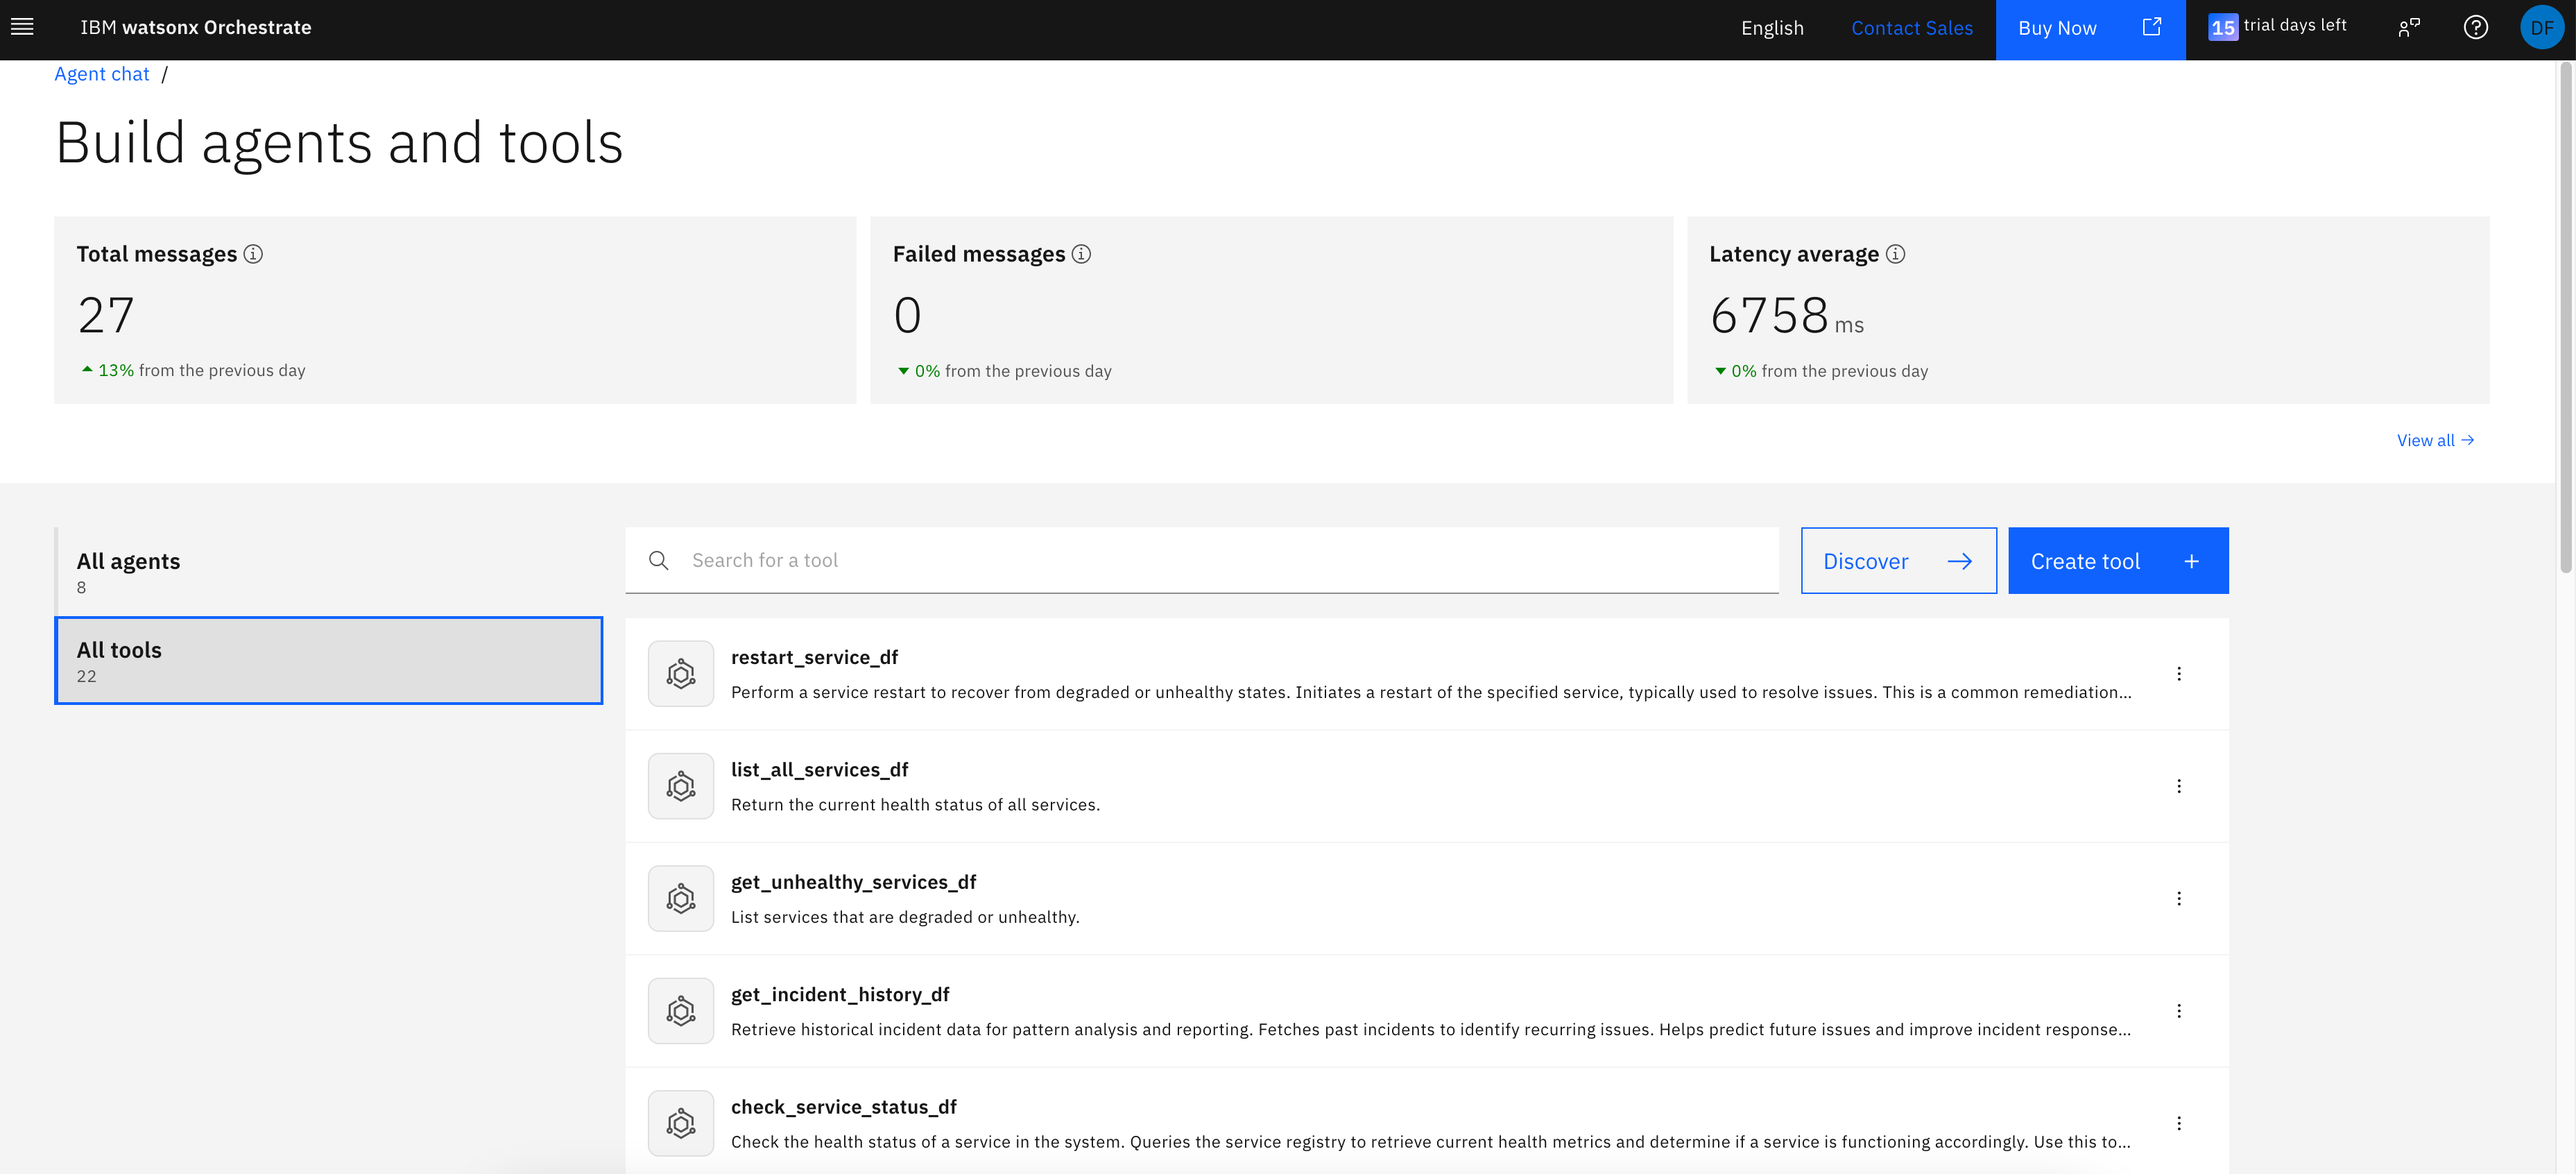

You can also use the command line to view existing tools, remove, etc.

In [148]:
!orchestrate tools --help

                                                                                
 Usage: orchestrate tools [OPTIONS] COMMAND [ARGS]...                           
                                                                                
 Interact with the tools in your active env                                     
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ --help          Show this message and exit.                                  │
╰──────────────────────────────────────────────────────────────────────────────╯
╭─ Commands ───────────────────────────────────────────────────────────────────╮
│ import   Import a tool into the active environment                           │
│ list     List the imported tools in the active environment                   │
│ remove   Remove a tool from the active environment                           │
│ export   Export a tool to 

In [149]:
!orchestrate tools list

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ Name                   ┃ Description            ┃ Type    ┃ Toolkit ┃ App ID ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ get_unhealthy_services │ List services that are │ python  │         │        │
│ _df                    │ degraded or unhealthy. │         │         │        │
├────────────────────────┼────────────────────────┼─────────┼─────────┼────────┤
│ restart_service_shreya │ Perform a service      │ python  │         │        │
│                        │ restart to recover     │         │         │        │
│                        │ from degraded or       │         │         │        │
│                        │ unhealthy states.      │         │         │        │
│                        │ Initiates a restart of │         │         │        │
│                        │ the specified service, │         │         │        │
│                        │ t

**19.)** Run the command to import and create your agent!

In [156]:
!ls -l sre-metlife

total 8
-rw-rw---- 1 wsuser wscommon  785 Oct 20 17:00 sre_agent.yaml
drwxrwx--- 3 wsuser wscommon 4096 Oct 20 18:00 tools


In [197]:
!orchestrate agents import -f ./sre-metlife/sre_agent.yaml

[INFO] - Existing Agent 'metlife_sre_helper' found. Updating...
[INFO] - Agent 'metlife_sre_helper' updated successfully


**20.)** Go to watsonx orchestrate Agent Builder [here](https://us-south.watson-orchestrate.cloud.ibm.com/build/manage), select the ```All Agents``` tab and you can view your Agent!<br>
<br>
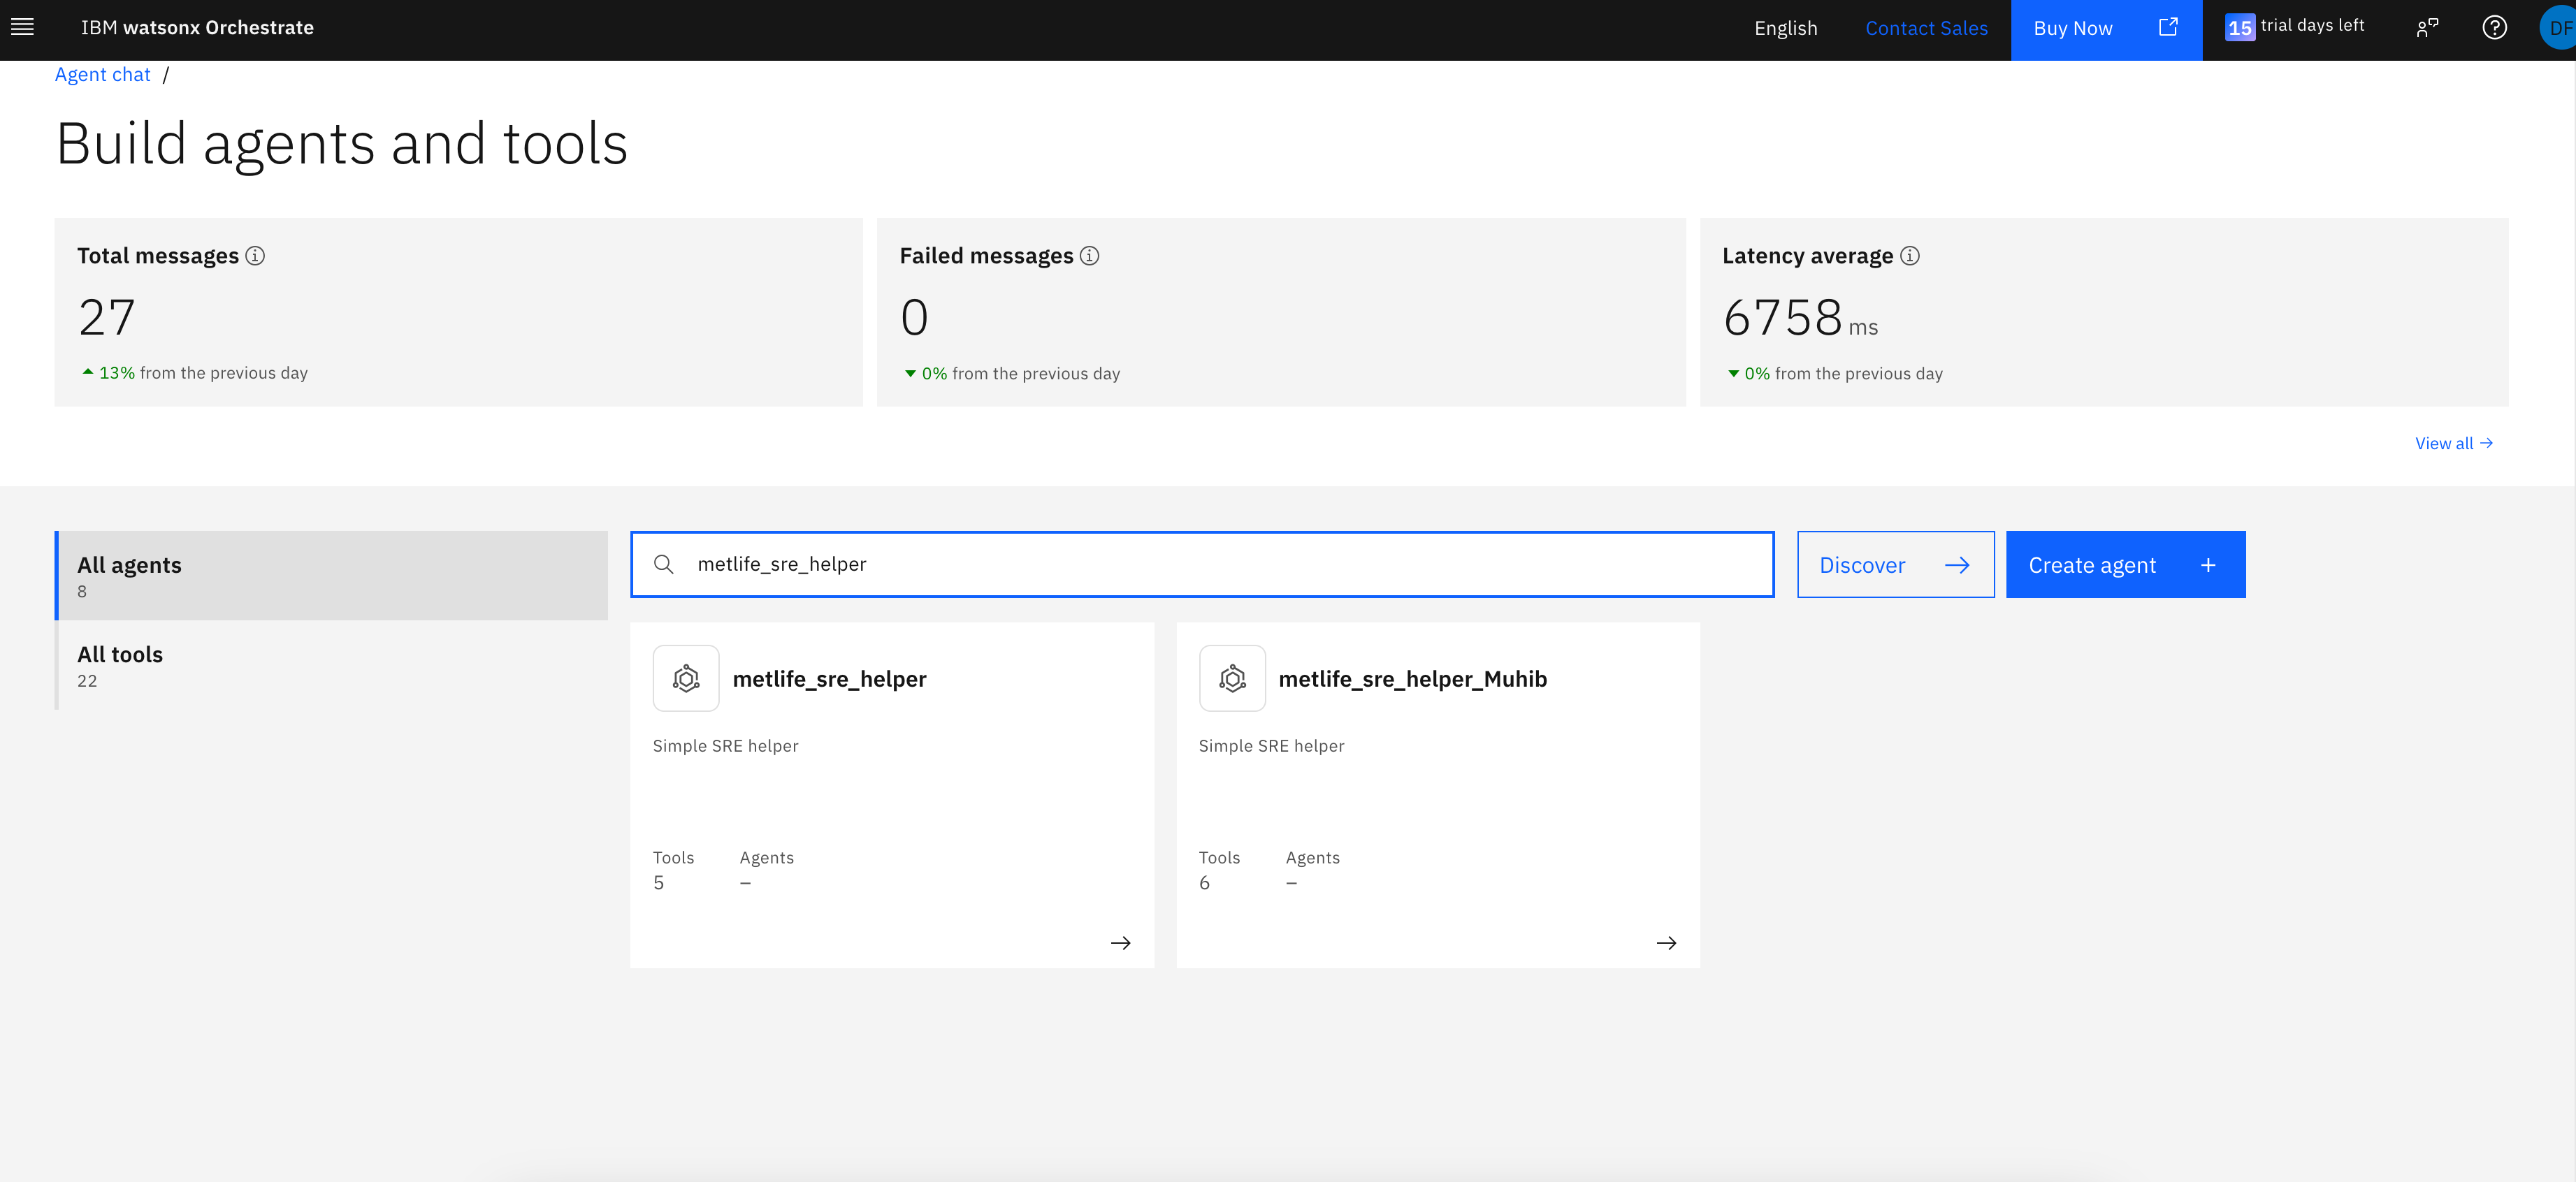

Click on your agent in the Agent Builder. Once you have entered the Agent you can see all Agent details and make any additional changes you may desire. Using the chat on the right you can test your Agent

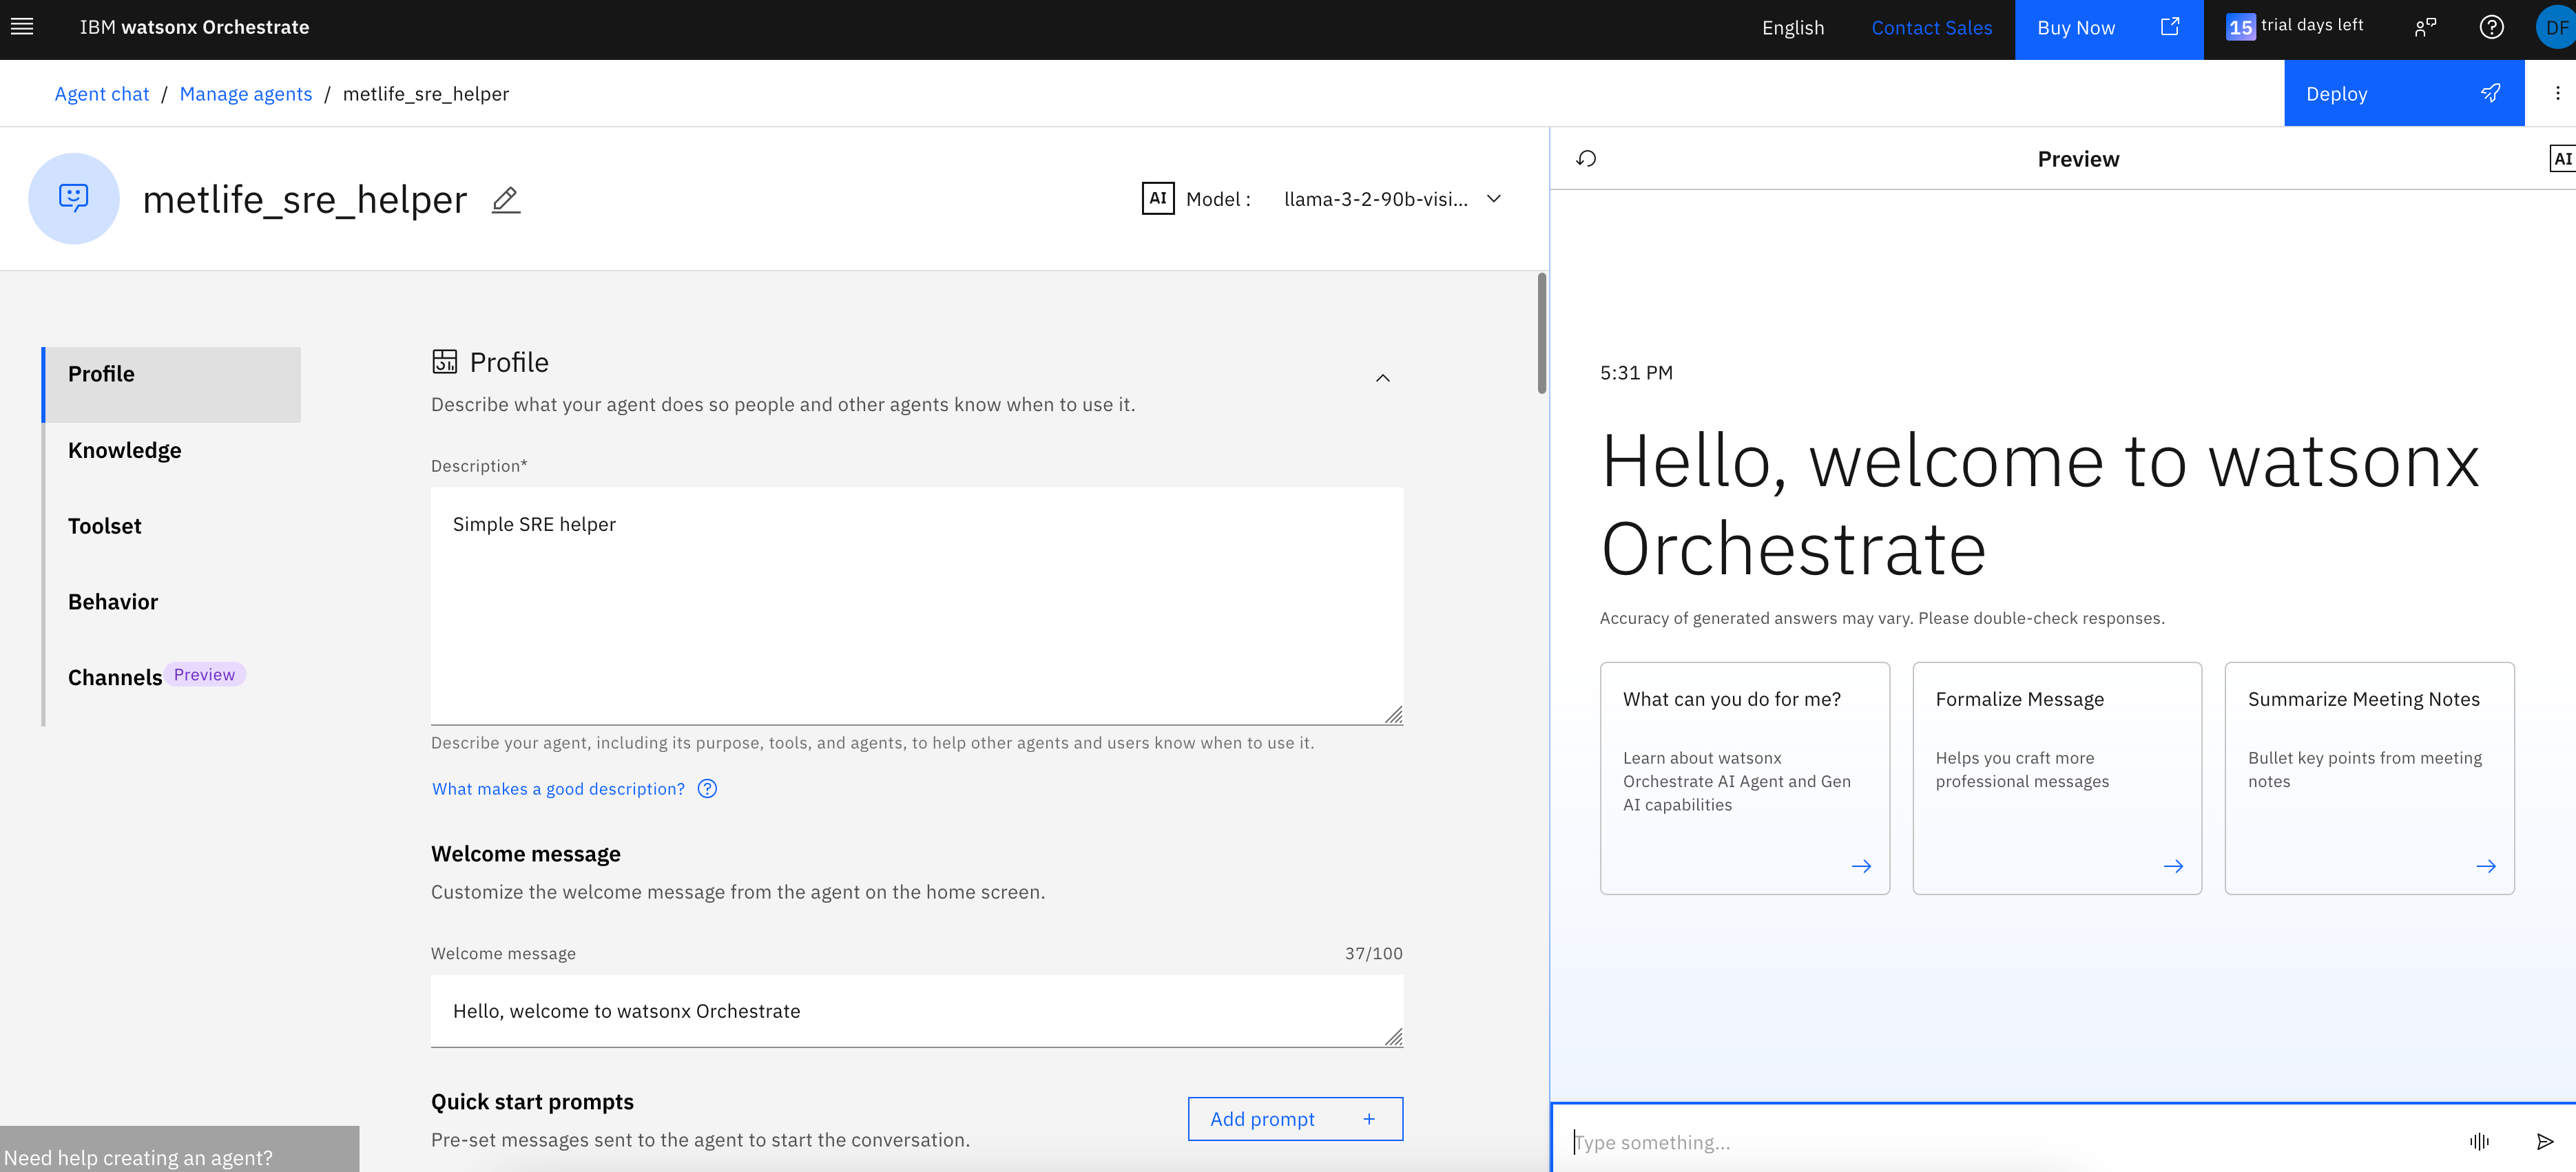

Notes : You can test your Agent using a local version of watsonx orchestrate with the watsonx Orchestrate Developer Edition but this is not a part of the lab. See more details [here](https://developer.watson-orchestrate.ibm.com/developer_edition/wxOde_overview#what-is-watsonx-orchestrate-developer-edition) on what the developer edition here.  This must be installed inside a docker container, for instructions on installing see details [here](https://developer.watson-orchestrate.ibm.com/developer_edition/wxOde_setup) 

**21.)** Now that you have a draft version of the Agent you can start testing to see how it performs with better understanding the state of your services within your organization. See below a set of test questions and corresponding responses, you should see something similar : 

**Question :** ```Show me all existing services within my organization``` <br>

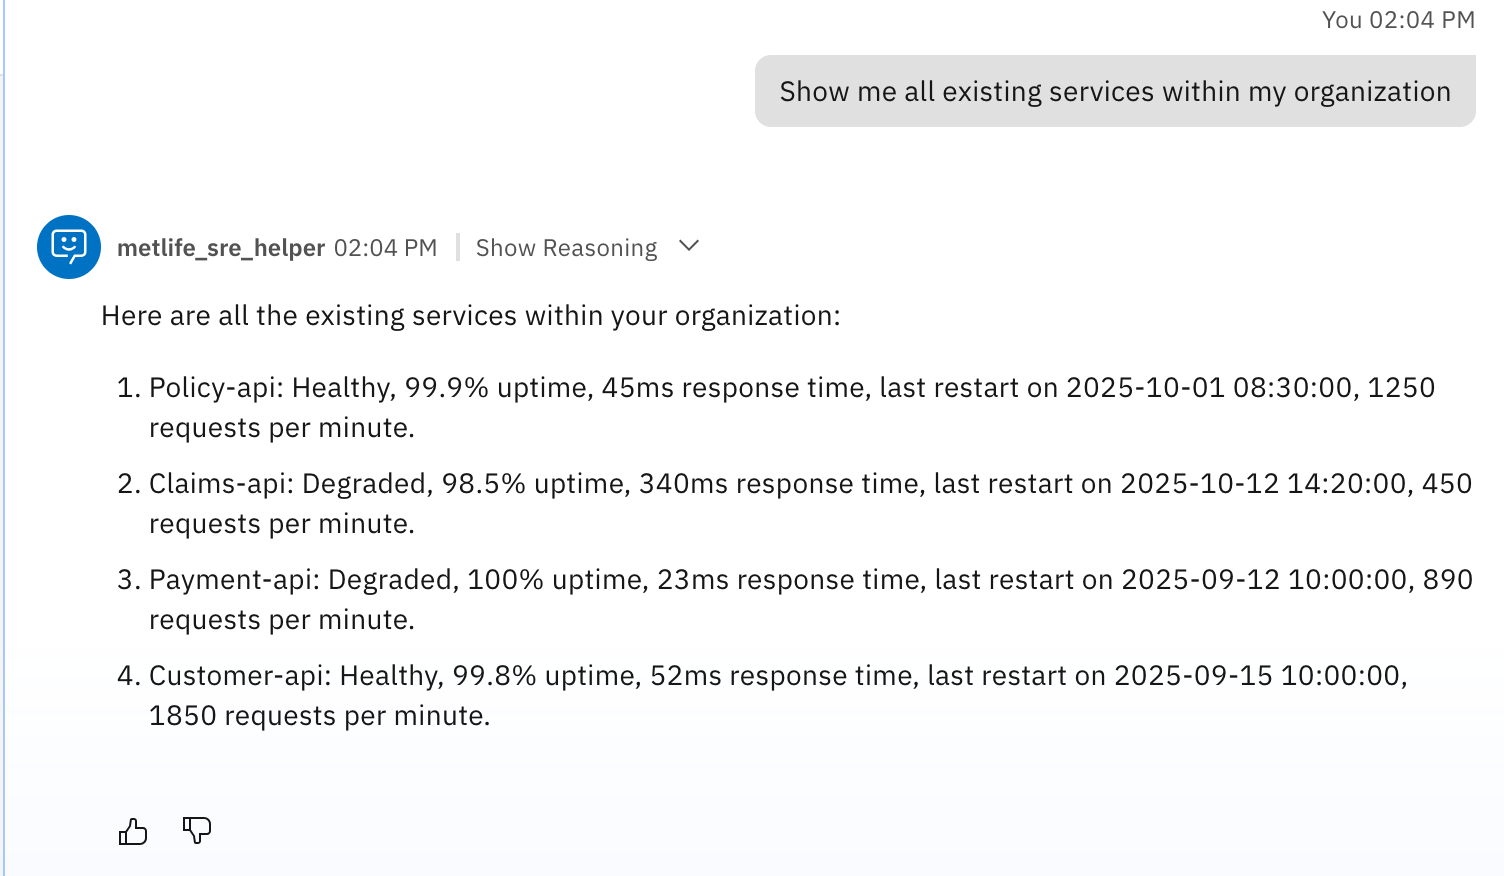

**Question :** ```Which of my services are unhealthy?``` <br>

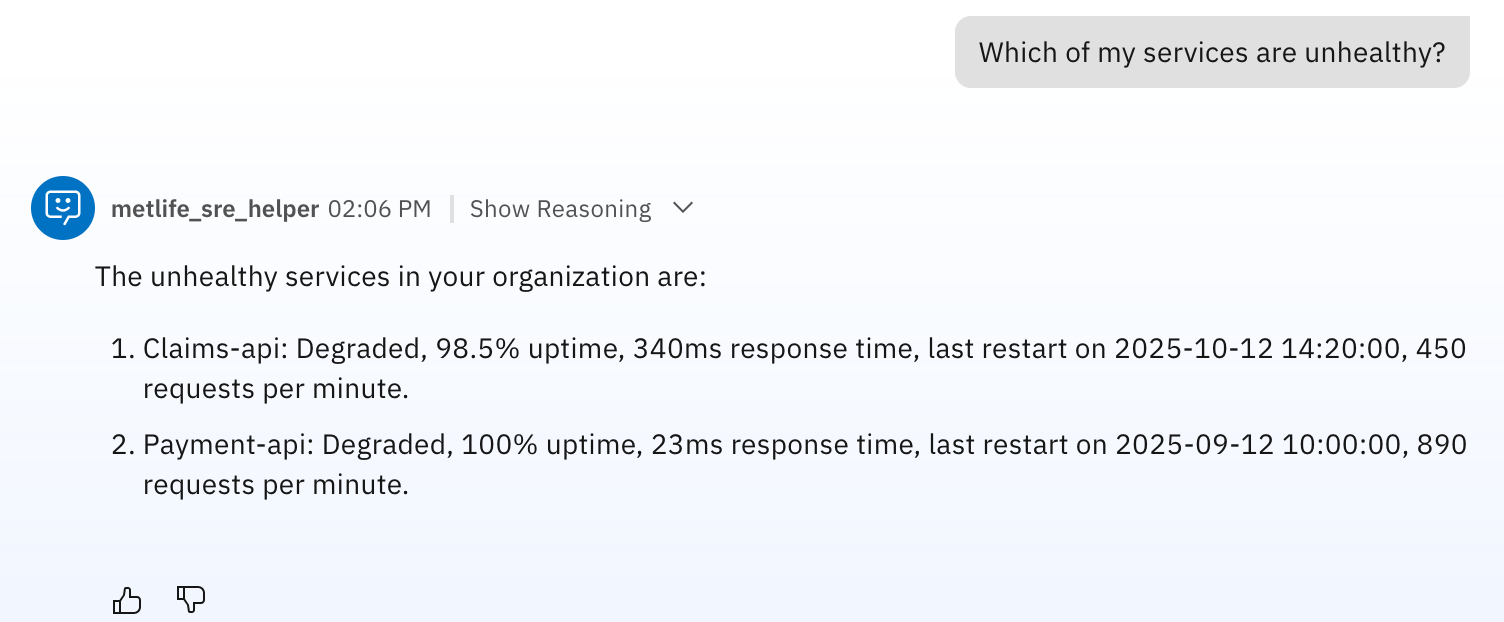

**Question :**  ```What do each of these services do?``` <br>

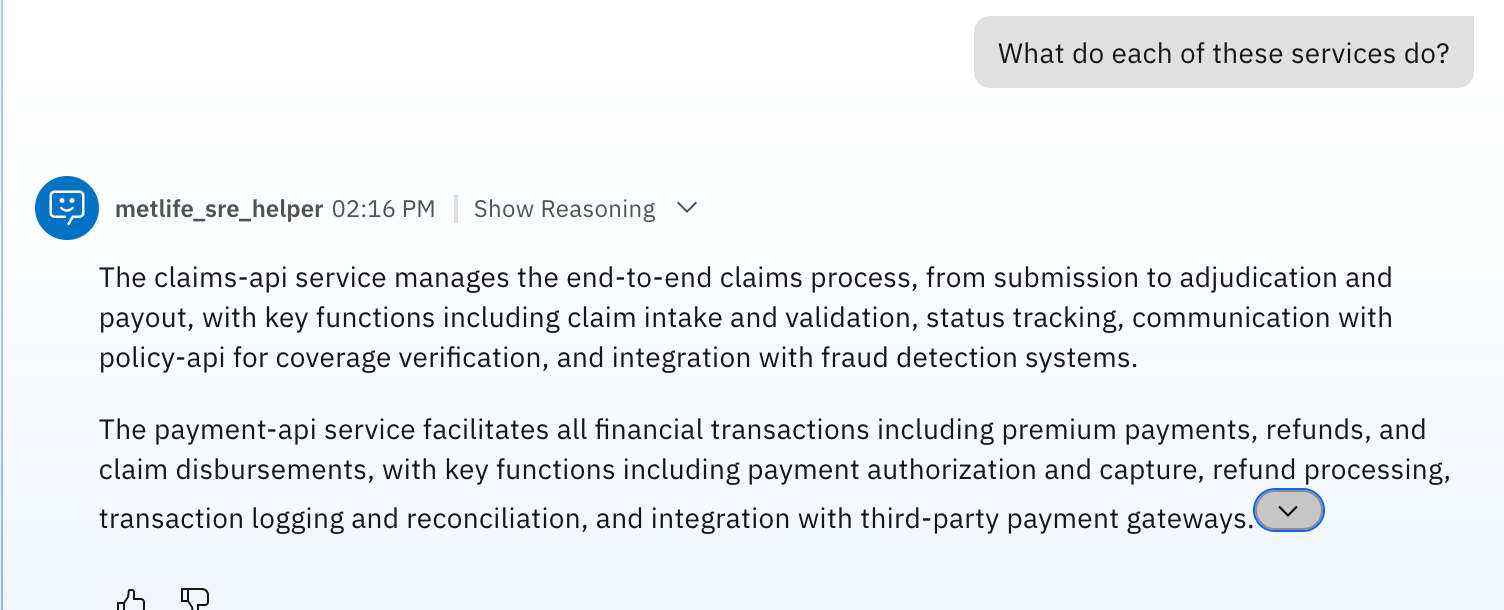

**Question :**  ```What is the risk if these services are down?``` <br>

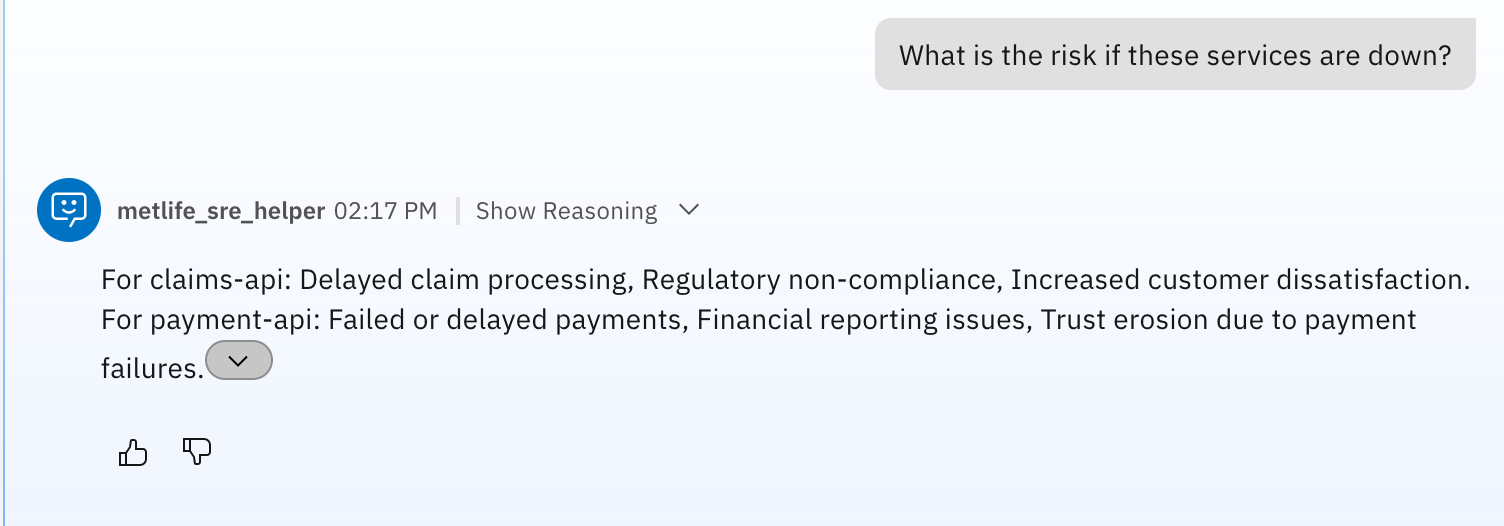

**Question :** ```What is the status of the claims api?``` <br>

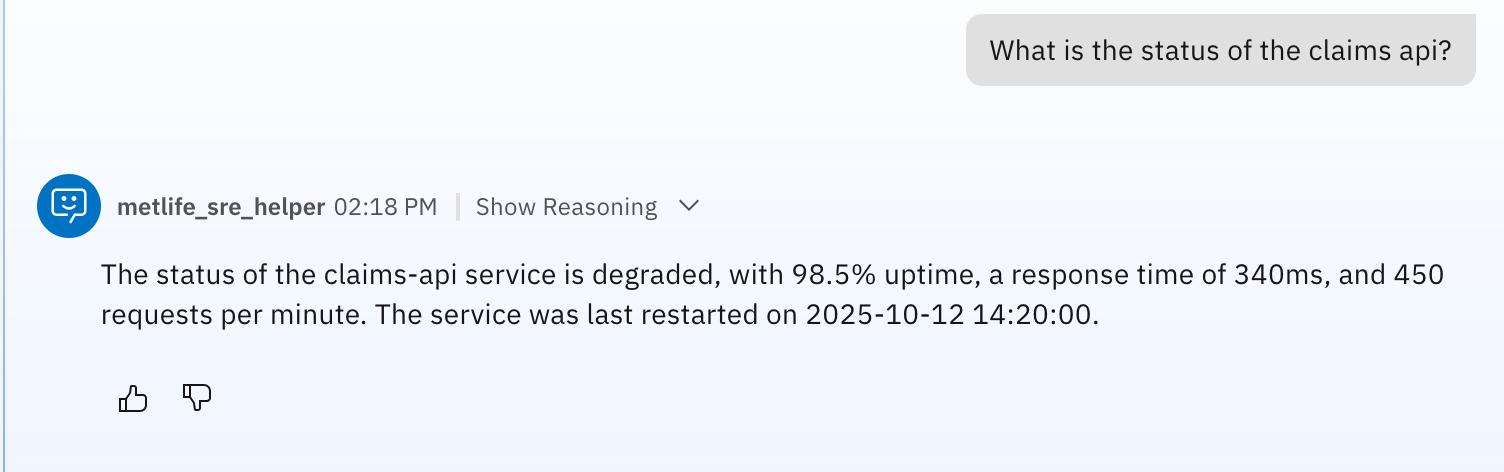

**Question :** ```Show me incidents for the claims api``` <br>

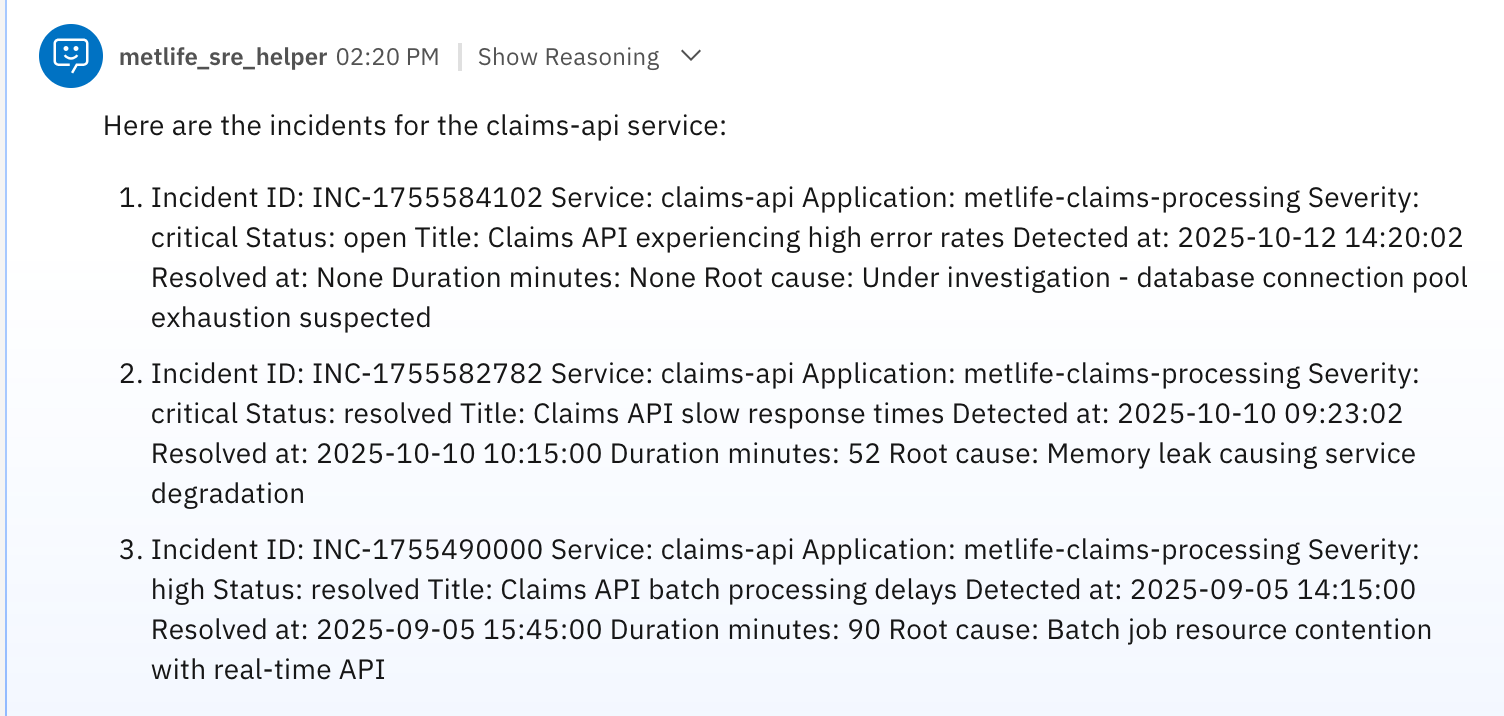

**Question :** ```Can you restart the claims api?``` <br>

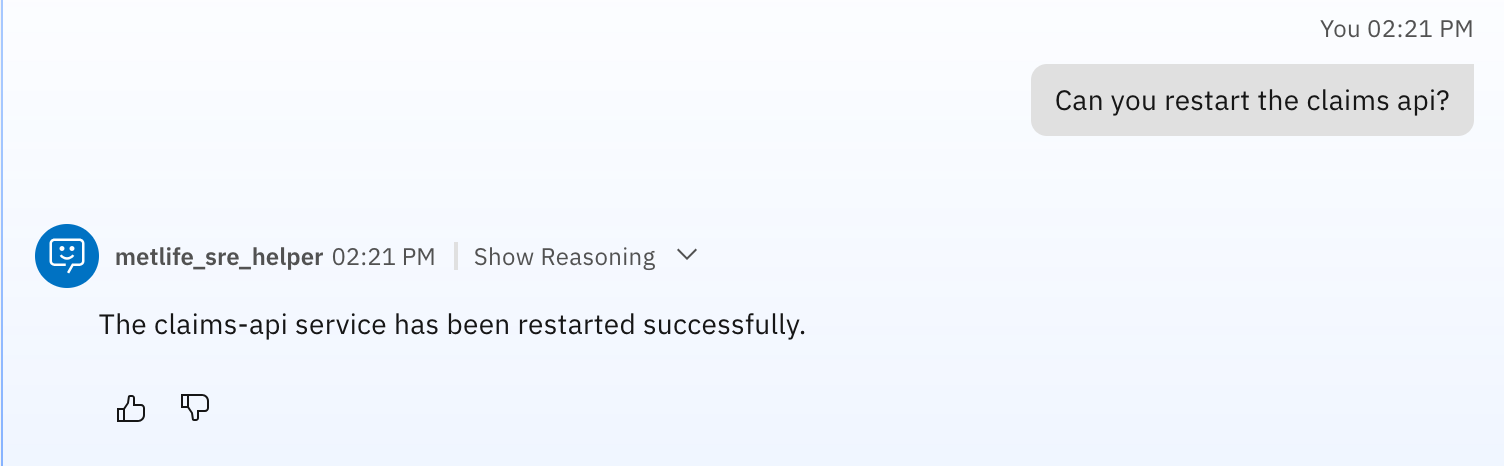

**Question :** ```What are the best practices I should follow moving forward to prevent some of the current issues?``` <br>

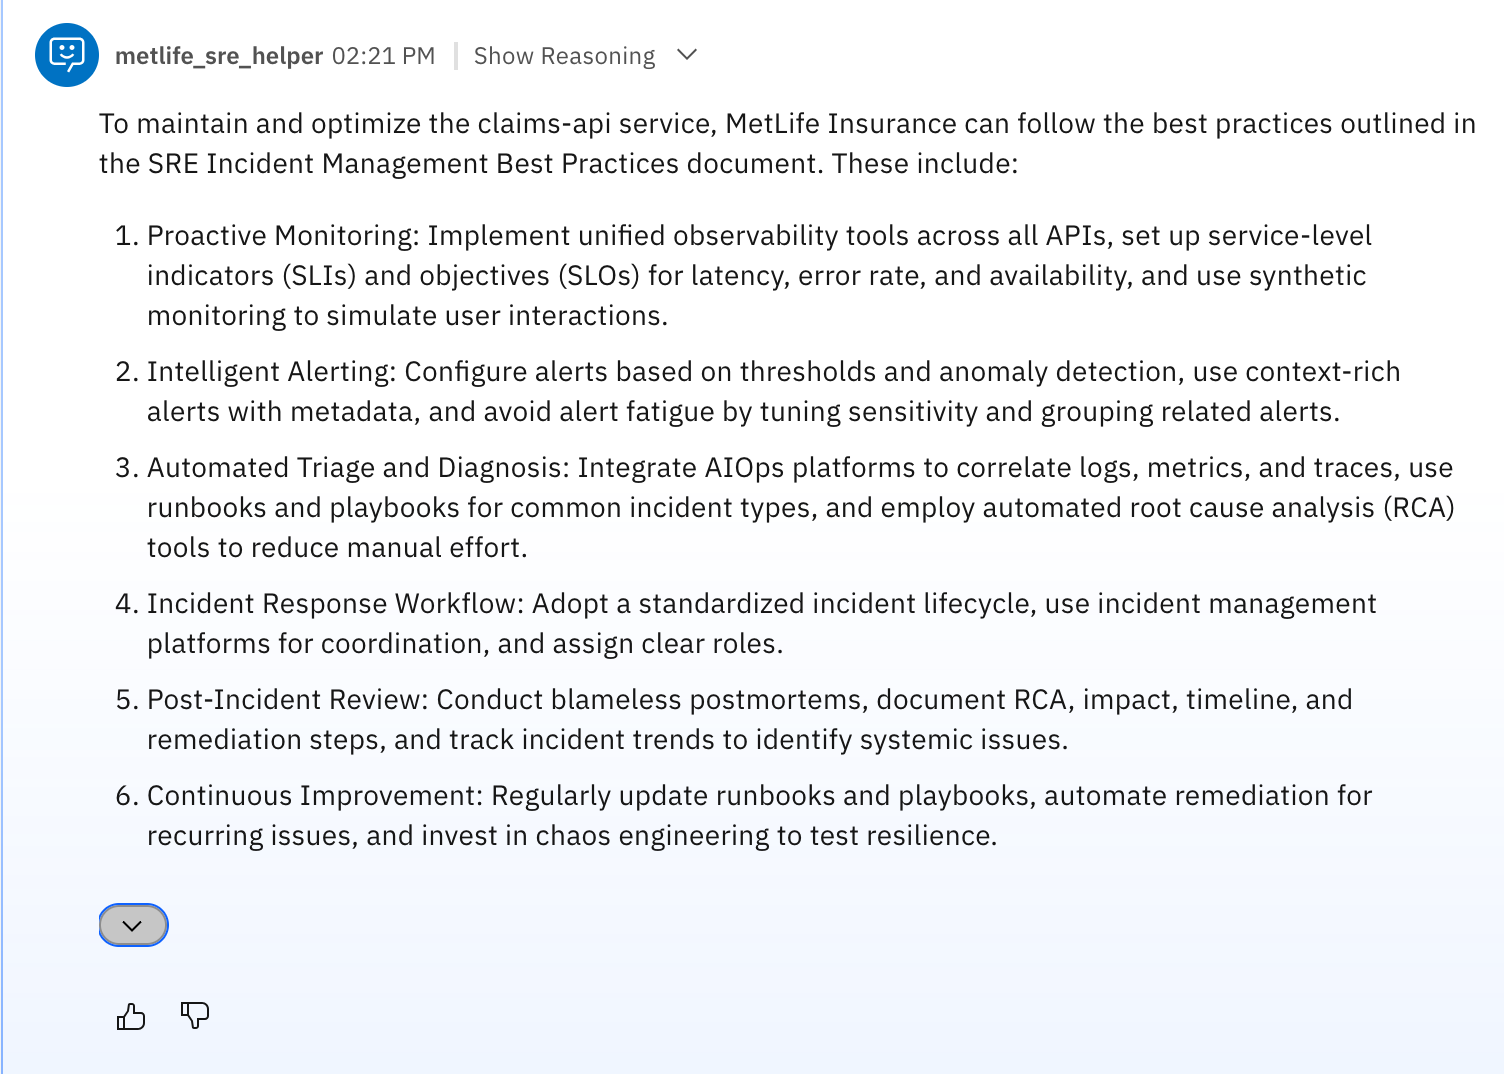

**22.)** Once you have tested and validated your agent and want to deploy it so it can be accessed within your enterprise environment. Run the below command with your agent name 

```orchestrate agents deploy --name agent_name```

In [160]:
!orchestrate agents deploy --name metlife_sre_helper

⠴ Deploying agent to Live envrionment
[INFO] - Successfully deployed agent metlife_sre_helper


If you want to undeploy please run the below command <br>

```orchestrate agents undeploy --name agent_name```

##### Additional Links :

[ADK Developer Edition](https://developer.watson-orchestrate.ibm.com/environment/initiate_environment)